<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="bankruptcy.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Bankruptcy Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Description
A company goes Bankrupt when the assets and shares taken by the company cross the liability. In most cases, bankruptcy models are based on financial indicators that describe the current condition or a certain area of financial health, such as profitability, indebtedness and so on. This research shall analyse the financial statements and market data of these companies and then try to apply several models to determine the bankruptcy. The goal is to find out how far back these models are able to predict that the companies would get into financial distress and which information about the financial ratios would enhance the prediction accuracy of the bankruptcy prediction model.

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="inter.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from Outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets work!</b></font></div>
    </td>
    </td>

</tr>

</table>


1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Analyising Target Variable](#Target_Variable)
        - 4.1.5 - [Distribution Analysis](#Distribution_Analysis)
        - 4.1.6 - [Outlier Analyis using Boxplots](#Outlier_Analysis)
        - 4.1.7 - [Null and Duplicate values](#Missing_Values)
        - 4.1.8 - [Correlation Analysis](#correlation)
        - 4.1.9 - [Bivariate and Multivariate Analysis](#Bivariate_and_Multivariate_Analysis)
        - 4.1.10 - [Data Analysis Summary](#Summary)
    - 4.2 - [Feature Engineering (Data Preparation)](#Data_preaparation)
        - 4.2.1 - [Removing redundant features](#Domain_removal)
        - 4.2.2 - [Outlier removal using IQR](#Outlier_removal)
        - 4.2.3 - [Treatment of Null values from Outlier removal](#Outlier_treatment)
        - 4.2.4 - [Multicolinearity reduction](#vif)
        - 4.2.5 - [Train-Test split](#train_test)
5. **[Modeling](#Modeling)**
    - 5.1 - [Logistic Regression(MLE)](#logit)
        - 5.1.1 - [Full model](#logit_full)
        - 5.1.2 - [RFE model](#logit_RFE)
        - 5.1.3 - [Model comparision](#logit_comp)
    - 5.2 - [Decision Tree](#dtc)

<a id='import_lib'></a>
## 1. Importing required Libraries

In [49]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

<a id='set_options'></a>
## 2. Set Options

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

In [3]:
# settig default figure and font size
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['font.size'] = 15

<a id='Read_Data'></a>
## 3. Reading the dataset

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let's import the dataset and start working<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# reading csv file using pandas
df = pd.read_csv('data.csv')

# displaying the top 5 rows of the dataframe
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985                 0.000126   
1                               0.781506                 0.000290   
2                               0.780284                 0.000236   
3                               0.781241                 0.000108   
4                               0.781550        7890000000.000000   

    Research and development expense rate   Cash flow rate  \
0                                0.000000         0.458143   
1                                0.000000         0.461867   
2                         25500000.000000         0.458521   
3                                0.000000         0.465705   
4                                0.000000         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725       0.000000   
1                              0.000647       0.000000   
2                              0.000790       0.000000   
3                              0.000449       0.000000   
4                              0.000686       0.000000   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

<a id='data_preparation'></a>
## 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making.  <br><br>
                        We will follow the steps mentioned below to analyse the dataset:-<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types. Refer data definition to ensure your data types are correct. If not, make necessary changes   <br>                       
                        3. Study summary statistics<br>
                        4. Univariate Analysis: Visualise target and Study distributions of independent variables<br> 
                        5. Detect outliers<br>
                        6. Check for missing and duplicate values<br>
                        7. Bivariate Analyis: Study correlation<br>
                        8. Analyze relationship between target variable and independent variables<br>                                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
### 4.1 Understanding the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

In [5]:
# checking the shape of the df
df.shape

(6819, 96)

There are 6819 rows and 96 columns in the dataset

In [6]:
# making a copy of the df
df1 = df.copy()

<a id='Data_Types'></a>
### 4.1.2 Checking Data Types

In [7]:
# checking data types
df1.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

All features are of numeric data type(int or float)

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Lets perform summary statistics on the dataset and remove insignificant variables <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# getting summary stats using df.describe
df1.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count 6819.000000                                        6819.000000          
mean     0.032263                                           0.505180          
std      0.176710                                           0.060686          
min      0.000000                                           0.000000          
25%      0.000000                                           0.476527          
50%      0.000000                                           0.502706          
75%      0.000000                                           0.535563          
max      1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000              6819.000000   
mean                                0.781381        1995347312.802792   
std                                 0.012679        3237683890.522487   
min                         

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.<br>
If we observe the count of all the variables, all of them are equal. So we can say that there are probably no missing values in these variables. Also, standard deviation of Net Income Flag is 0, which means that this feature is insignificant for further analysis.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# removing Net Income Flag because it has std of 0 and is insignificant to further analysis
df1 = df1.drop(' Net Income Flag',axis = 1)

<a id='Target_Variable'></a>
### 4.1.4 Analyising Target Variable

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets analyise the target variable "Bankrupt?"
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df1['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [12]:
df1['Bankrupt?'].value_counts(normalize = True) * 100

0   96.773720
1    3.226280
Name: Bankrupt?, dtype: float64

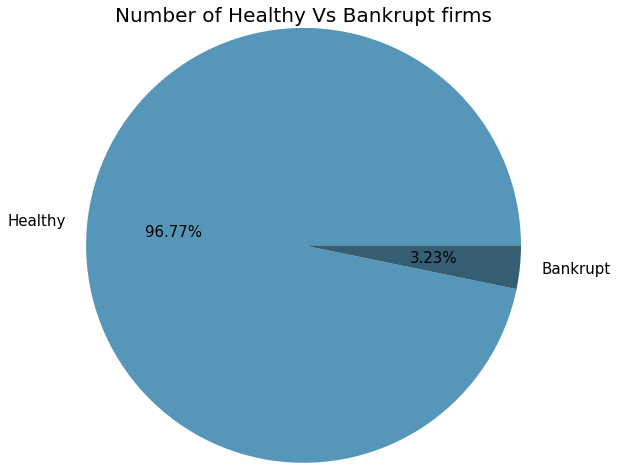

In [36]:
plt.pie(df['Bankrupt?'].value_counts(),colors=['#5696b8','#355d73'],autopct='%.2f%%',labels = ['Healthy','Bankrupt'],
       radius = 1.25)
plt.title('Number of Healthy Vs Bankrupt firms',fontsize=20)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>There are way more Healthy firms than Bankrupt firms in the dataset</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Distribution_Analysis'></a>
### 4.1.5  Distribution Analysis using measure of kurtois, skewness and distribution plots

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets analyse distribution of each variable in the dataset using the measure kurtosis and skewness. Then we will plot distribution plots for every variable.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# identifying leptokurtic features
kurt = df1.kurt()
len(kurt[kurt > 2])

85

In [14]:
# identifying highly skewed features
skew = df1.skew()
len(skew[abs(skew) >= 1])

82

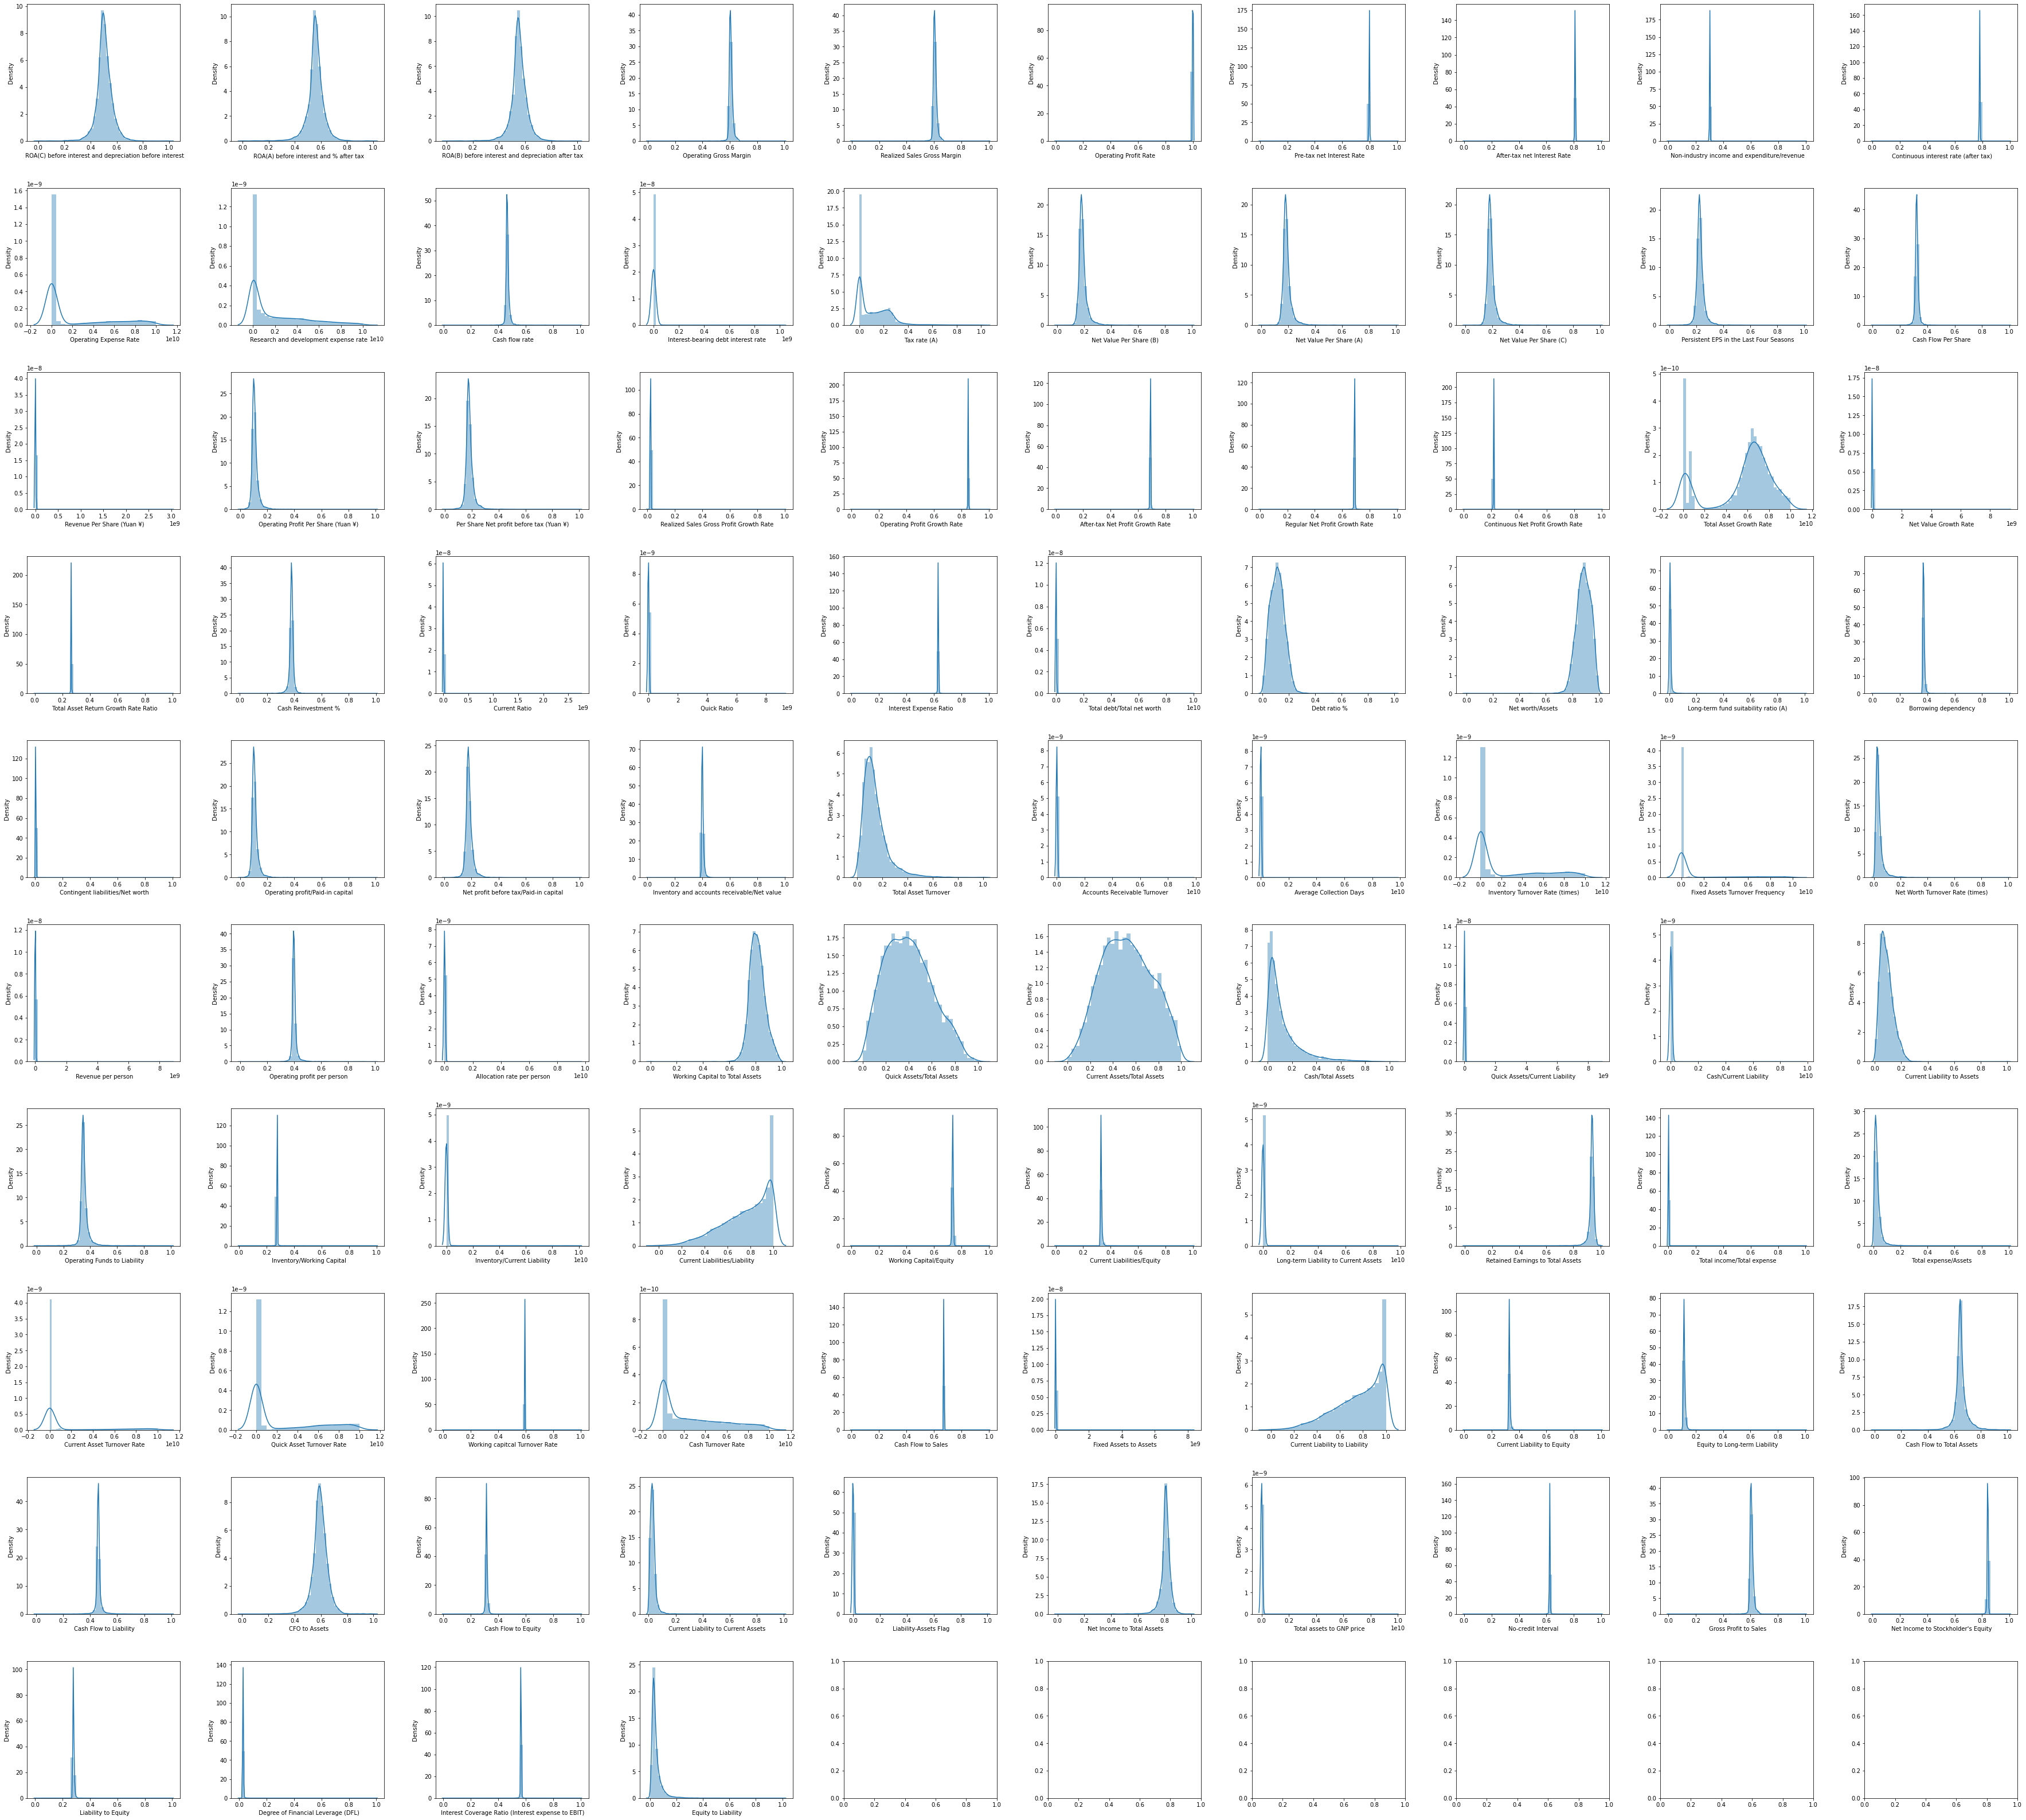

In [15]:
# plotting distribution plots
fig, ax = plt.subplots(nrows = 10, ncols= 10, figsize=(50,45))

for variable, subplot in zip(df1.columns[1:], ax.flatten()):
    z = sns.distplot(df1[variable], ax=subplot)
    plt.tight_layout(pad=4.0)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b> As seen in our kurtosis and skewness anaylsis as well, most features are skewed and leptokurtic, so median will be a better measure of central tendency</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Outlier_Analysis'></a>
### 4.1.6 Outlier Analysis using Boxplots

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets analyse outliers for each variable in the dataset using Boxplots.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

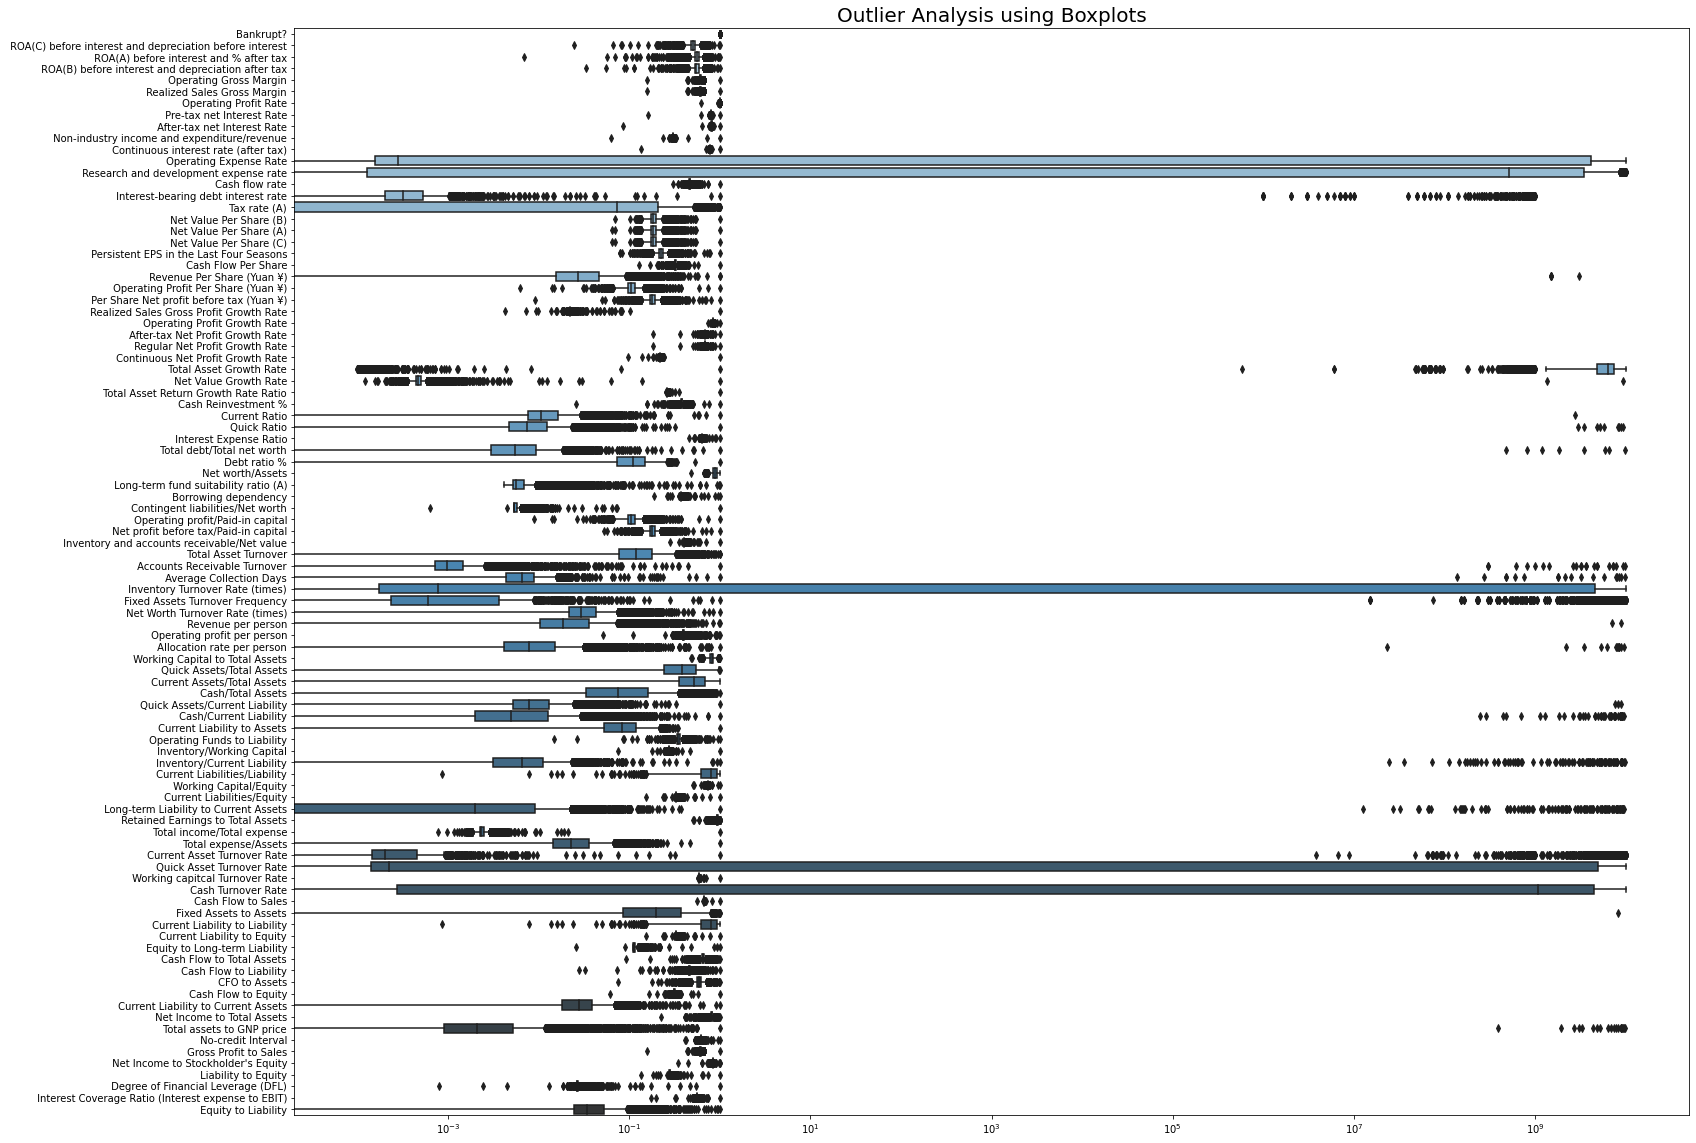

In [45]:
# plotting boxplots for all variables using seaborn
plt.figure(figsize = (25,20))
ax =sns.boxplot(data = df1, orient="h",palette="Blues_d")
ax.set_title('Outlier Analysis using Boxplots', fontsize = 20)
ax.set(xscale="log")
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b> There are alot of outliers in most of the features, removing these outliers might improve the performance of our model(s)</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.7 Null and Duplicate values 

In [17]:
# checking for columns with null values
[i for i in df1 if df1[i].isnull().sum() > 0]

[]

In [18]:
#checking for duplicated values
df.duplicated().sum()

0

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b> There are no null or duplicate values in the dataset</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='correlation'></a>
### 4.1.8 Correlation Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>Correlation is a statistic that measures the degree to which two variables move in relation to each other.<br><br>In order to compute the correlation matrix, we perform the following:<br>            
                    1. Call the corr() function which will return the correlation matrix of numeric variables <br>
                    2. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix<br>
                    3. Extract list of highly correlated pairs (corr > 0.7)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# calling cor() function to get correlation matrix
corr = df1.drop(['Bankrupt?'],axis = 1).corr()
corr

ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
 Realized Sales Gross Margin                                                                 0.332755          
 Operating Profit Rate                                                                       0.035725          
 Pre-tax net Interest Rate                                                                   0.053419          
 After-tax net Interest Rate                                                                 0.049222          
 Non-industry income and expenditure/revenue                                                 0.020501          
 Continuous interest rate (after tax)                                                        0.051328          
 Operating Expense Rate                                                                      0.066869          
 Research and development expense rate                                                       0.106461          
 Cash flow rate                                                                              0.323482          
 Interest-bearing debt interest rate                                                         0.048882          
 Tax rate (A)                                                                                0.250761          
 Net Value Per Share (B)                                                                     0.505580          
 Net Value Per Share (A)                                                                     0.505407          
 Net Value Per Share (C)                                                                     0.505281          
 Persistent EPS in the Last Four Seasons                                                     0.775006          
 Cash Flow Per Share                                                                         0.379839          
 Revenue Per Share (Yuan ¥)                                                                 -0.015932          
 Operating Profit Per Share (Yuan ¥)                                                         0.687201          
 Per Share Net profit before tax (Yuan ¥)                                                    0.750564          
 Realized Sales Gross Profit Growth Rate                                                     0.000591          
 Operating Profit Growth Rate                                                                0.036511          
 After-tax Net Profit Growth Rate                                                            0.115083          
 Regular Net Profit Growth Rate                                                              0.115040          
 Continuous Net Profit Growth Rate                                                           0.025234          
 Total Asset Growth Rate                                                                     0.019635          
 Net Value Growth Rate                                                                      -0.021930          
 Total Asset Return Growth Rate Ratio                                                        0.079906          
 Cash Reinvestment %                                                                         0.296158          
 Current Ratio                                                                               0.013196          
 Quick Ratio                                                                                -0.026336          
 Interest Expense Ratio                                                                      0.003988          
 Total debt/Total net

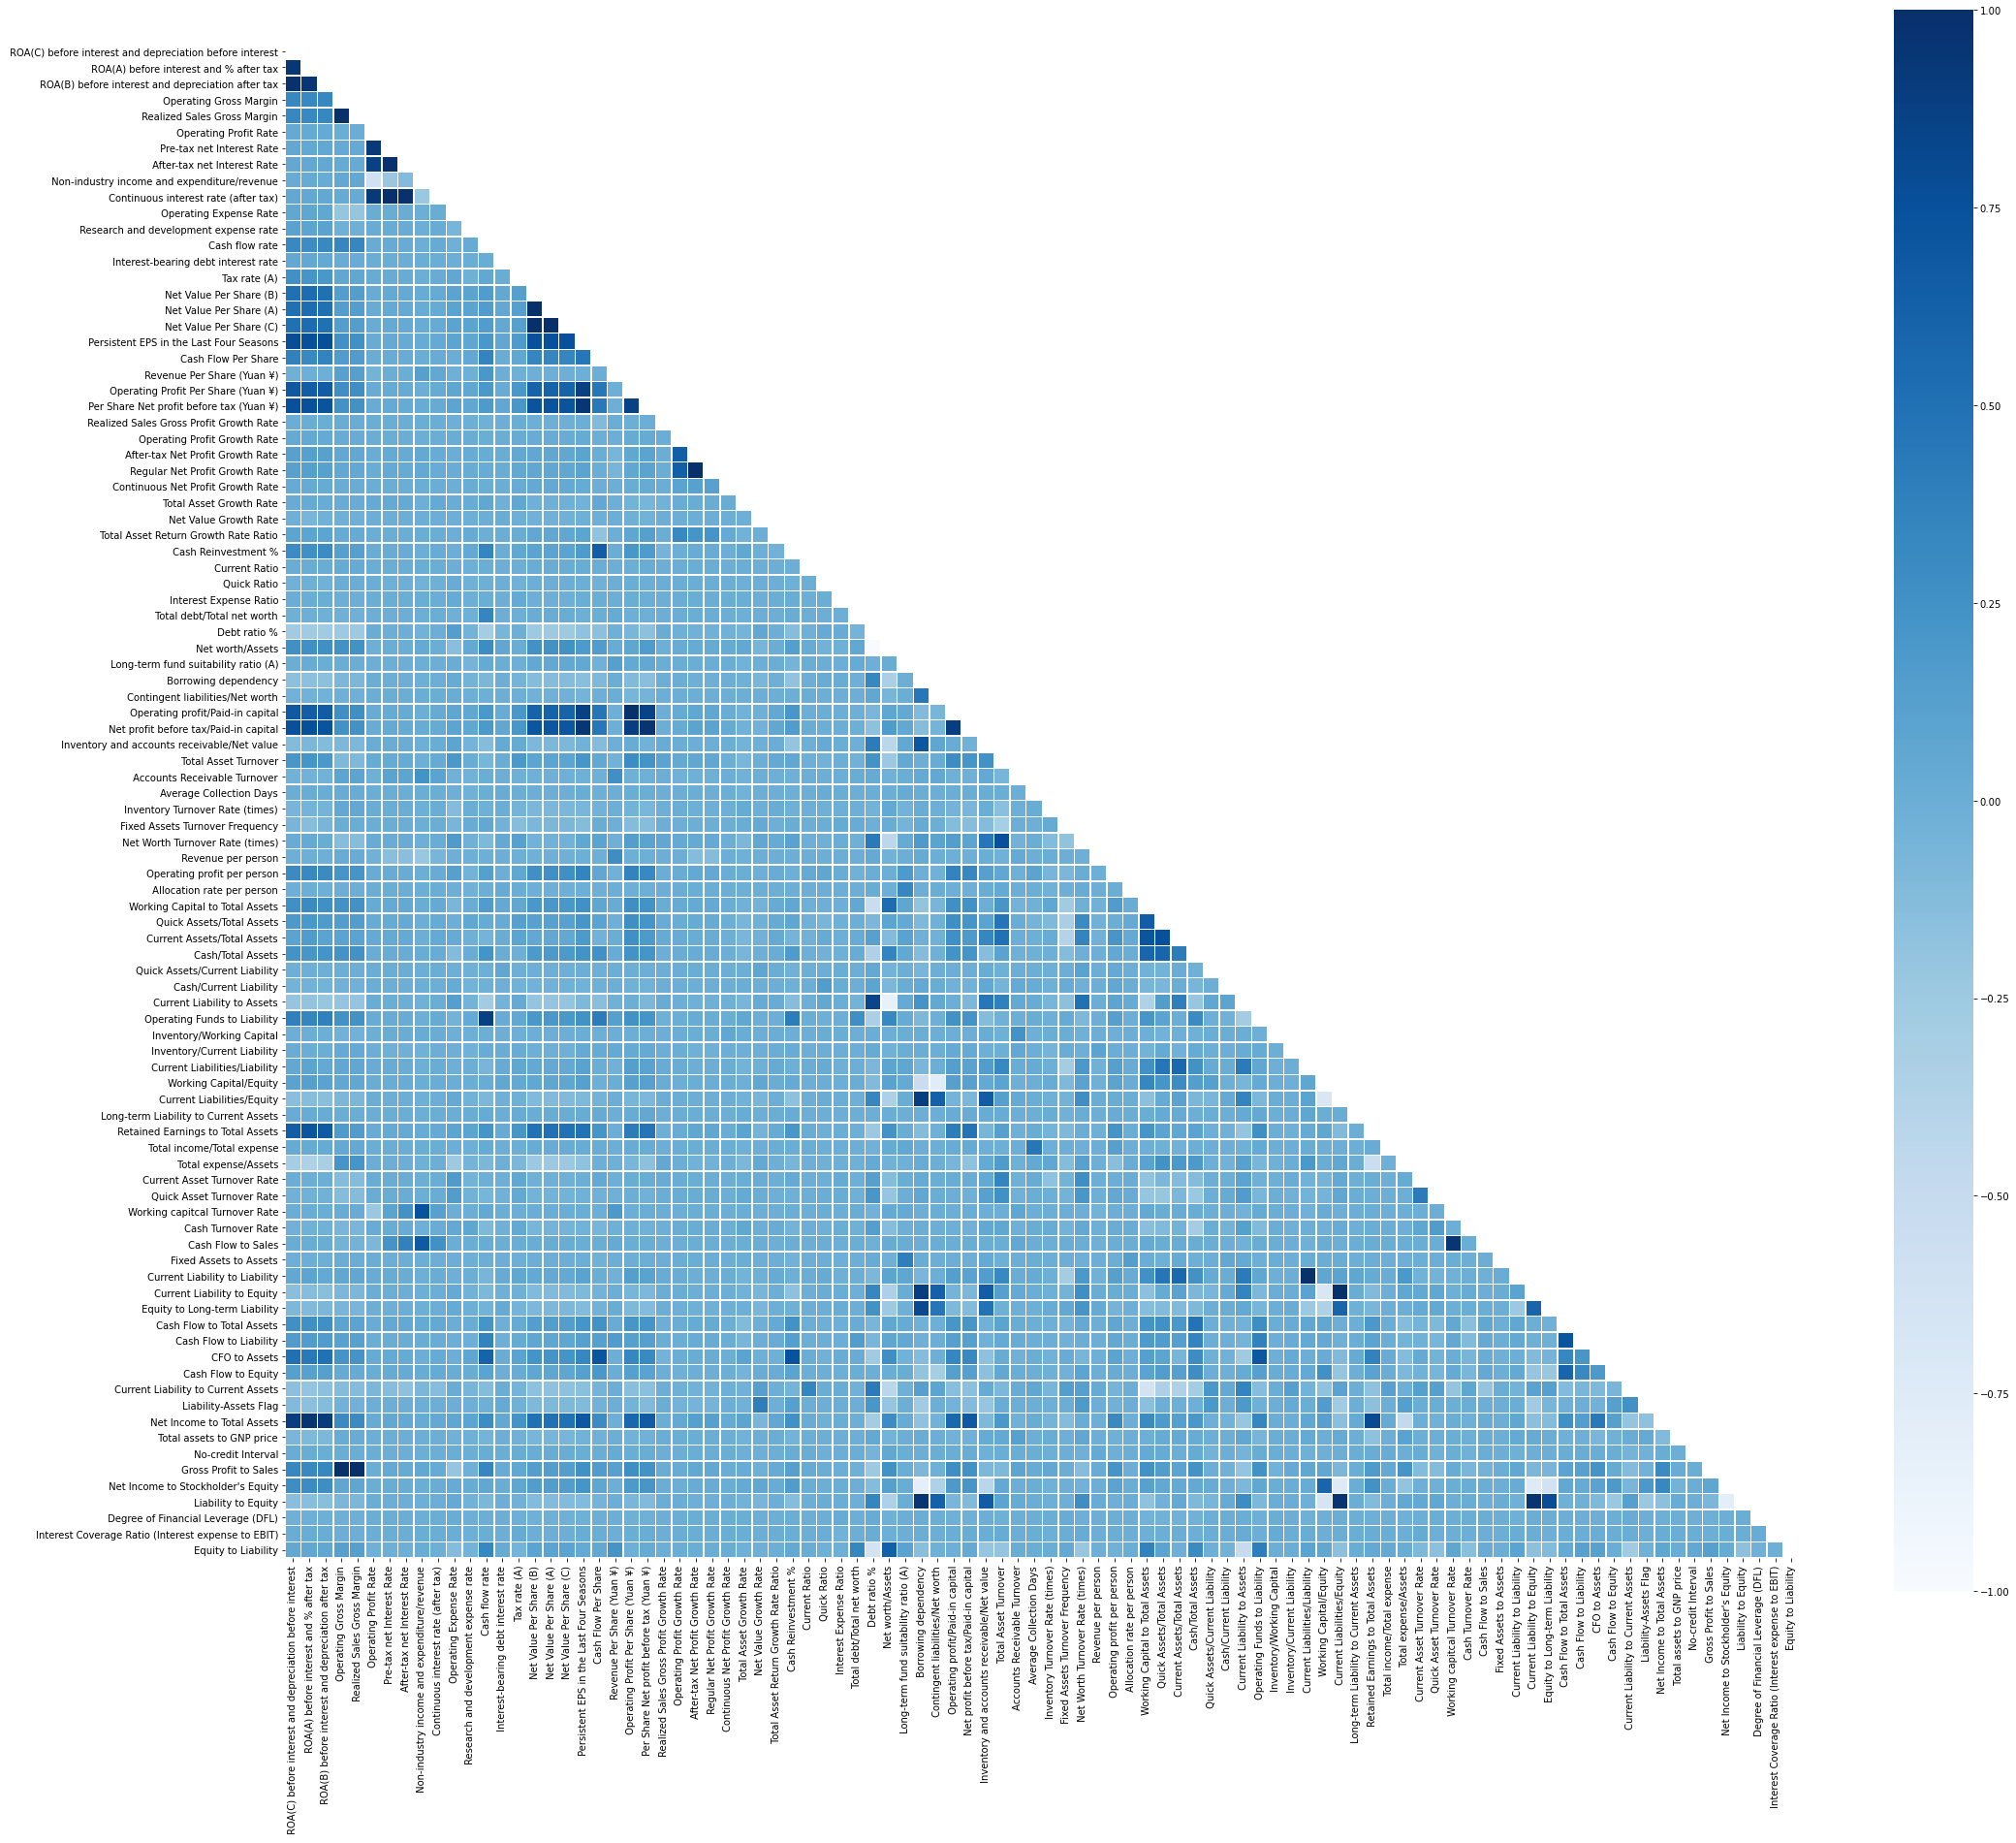

In [20]:
# plotting correlation heatmap
plt.figure(figsize = (35,30))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, mask=mask,cmap='Blues',square=True, linewidths=.5) #, cbar_kws={"shrink": .5}
plt.show()

In [24]:
# identifying features with greater than 0.70 correlation
correlated_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.70:
            colnamei = corr.columns[i]
            colnamej = corr.columns[j]
            correlated_features.append([colnamei, colnamej])
len(correlated_features)

77

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b> There seems to be a high - extreme correlation between some of the independent variables</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Bivariate_and_Multivariate_Analysis'></a>
### 4.1.9 Bivariate and Multivariate Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>In order to perform Bivariate and Multivariate Analysis, we perform the following:<br>            
                    1. Plot barplots to compare medians of Bankrupt and healthy firms for all features <br>
                    2. Identify pairs with extremly high correlation<br>
                    3. Plotting a scatterplot of those pairs with hue as "Bankrupt?" 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

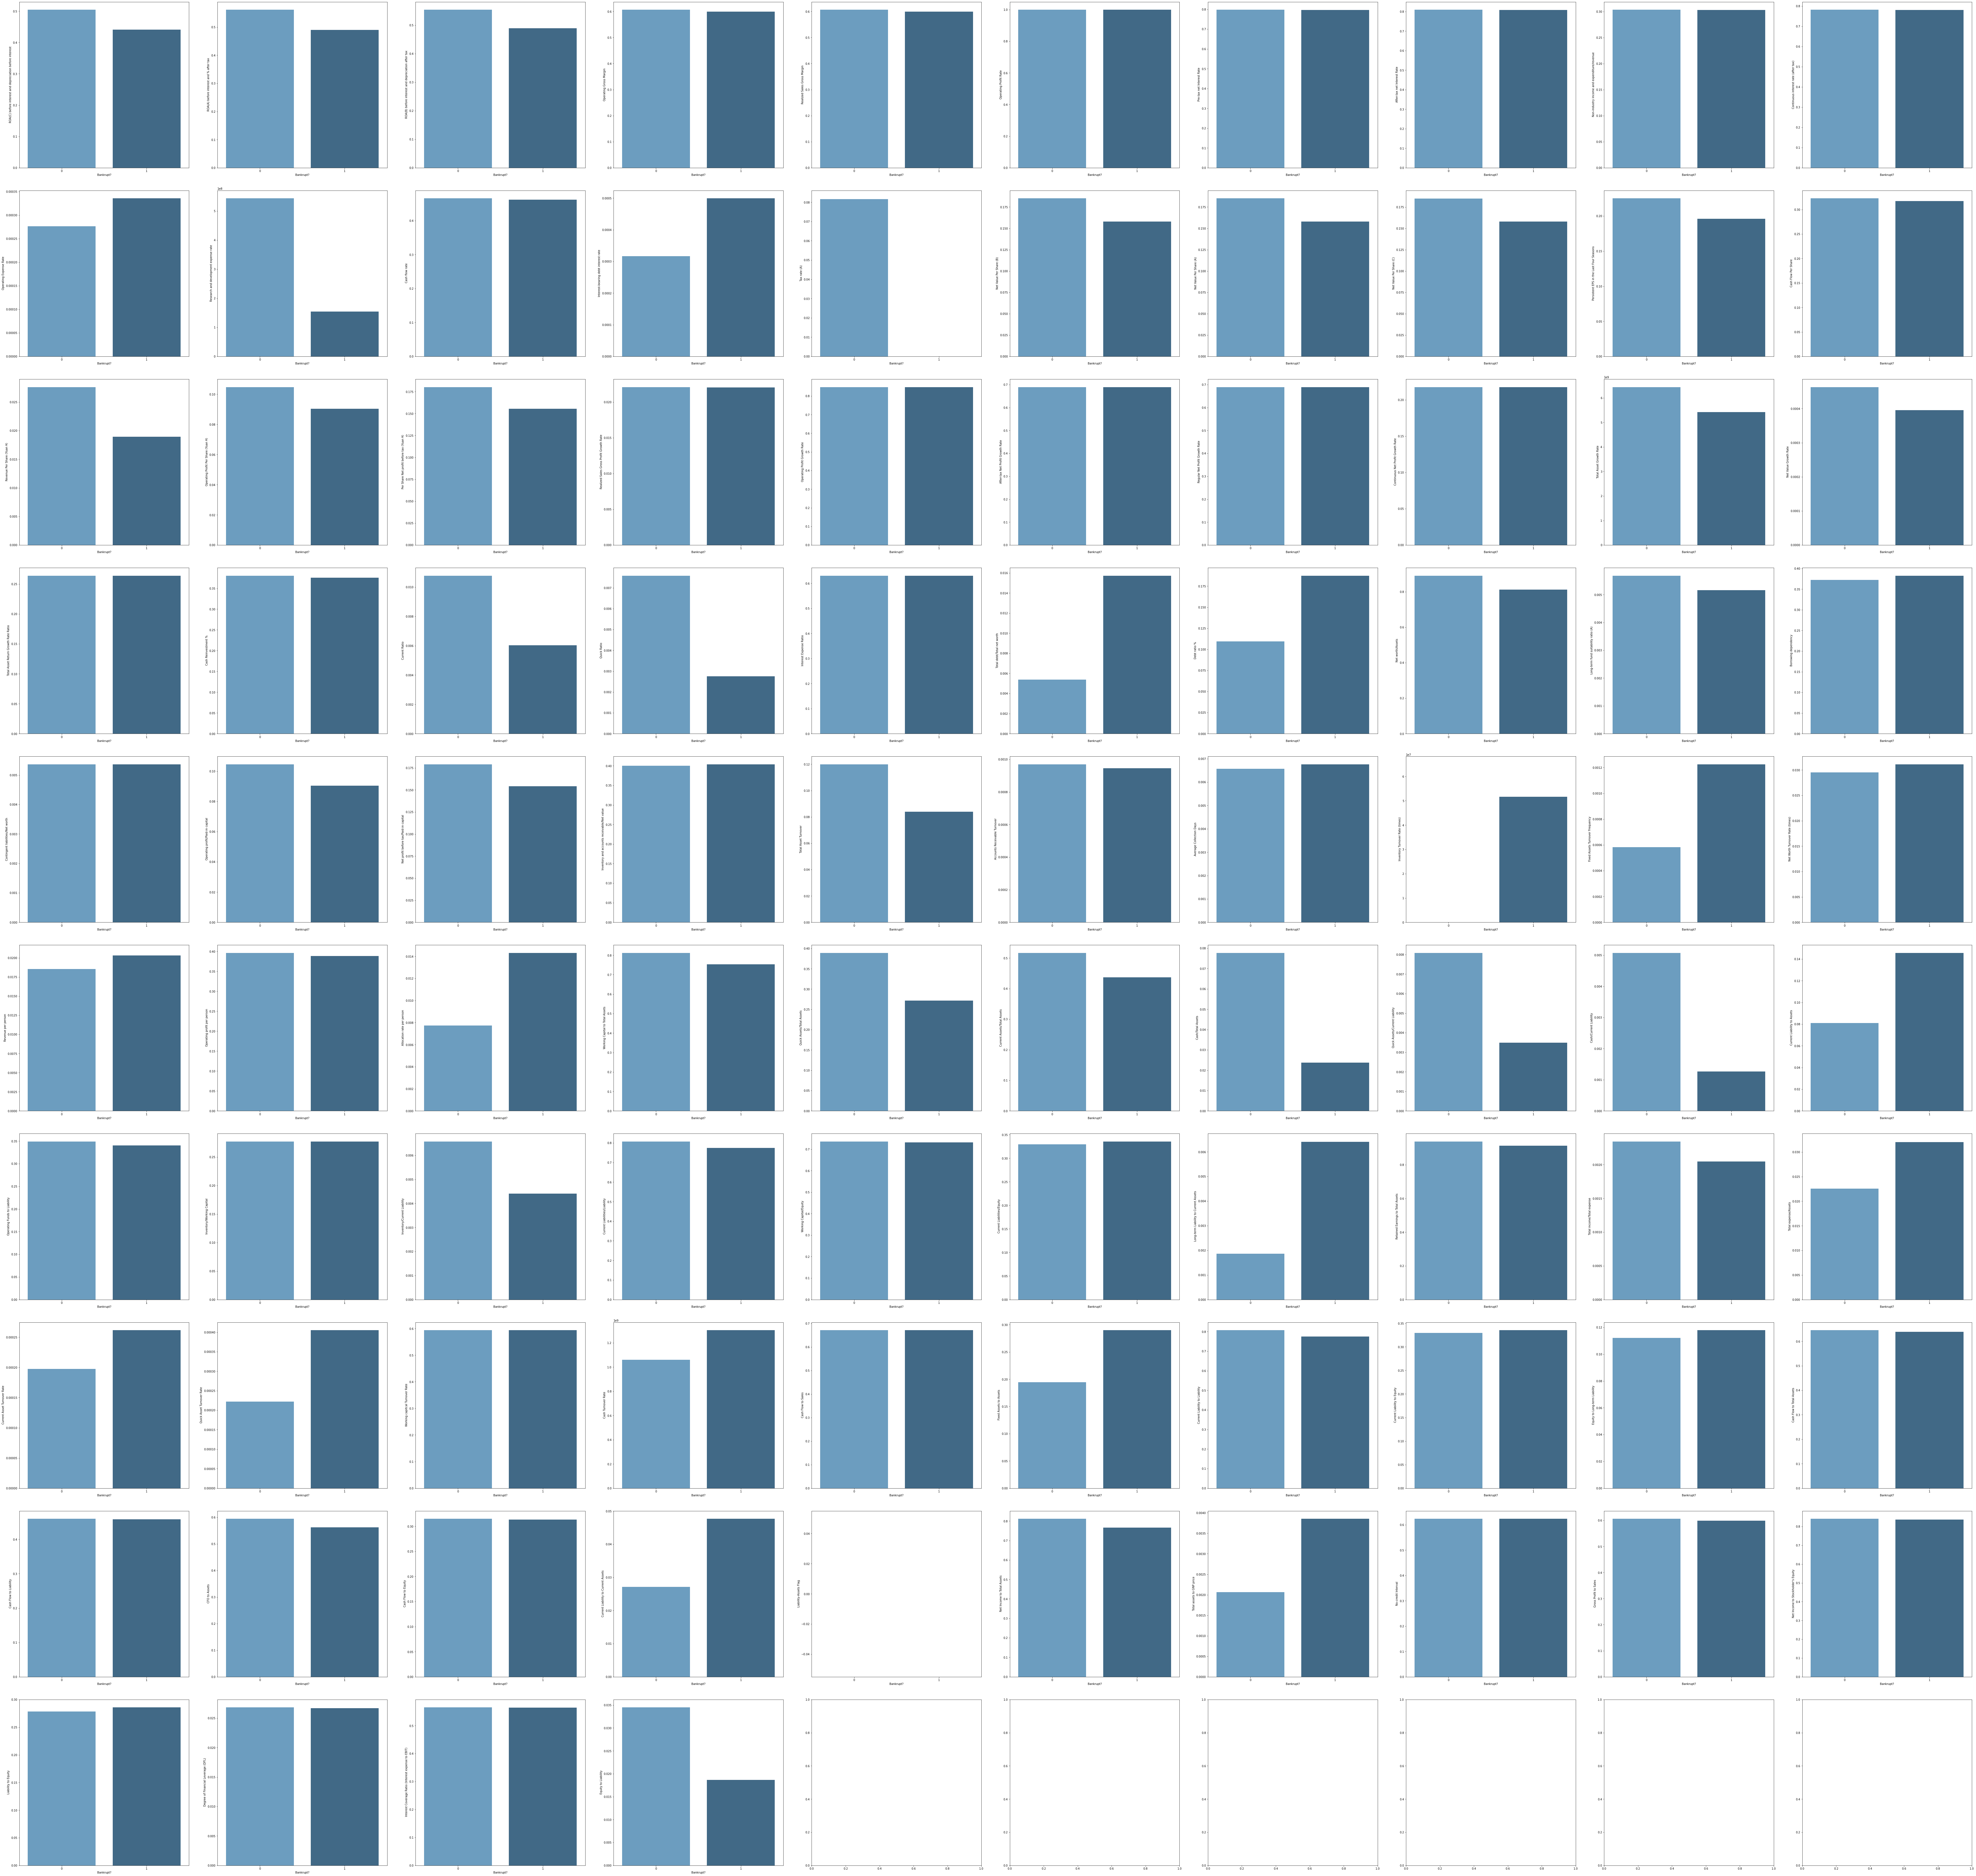

In [22]:
# plotting barplots to compare medians of Bankrupt and healthy firms for all features
fig, ax = plt.subplots(nrows = 10, ncols= 10, figsize=(100,95))

for variable, subplot in zip(df1.columns[1:], ax.flatten()):
    z = sns.barplot(df1['Bankrupt?'],df1[variable], estimator=np.median, ax=subplot, ci = 0, palette="Blues_d")
    plt.tight_layout(pad=4.0)

In [23]:
# looking at values in Liability-Assets Flag
df1[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [10]:
# removing Liability-Assets Flag as it is insignificant for further analysis
df1 = df1.drop(' Liability-Assets Flag',axis = 1)

In [28]:
# identifying features with extremly high correlation
correlated_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.90:
            colnamei = corr.columns[i]
            colnamej = corr.columns[j]
            correlated_features.append([colnamei, colnamej])

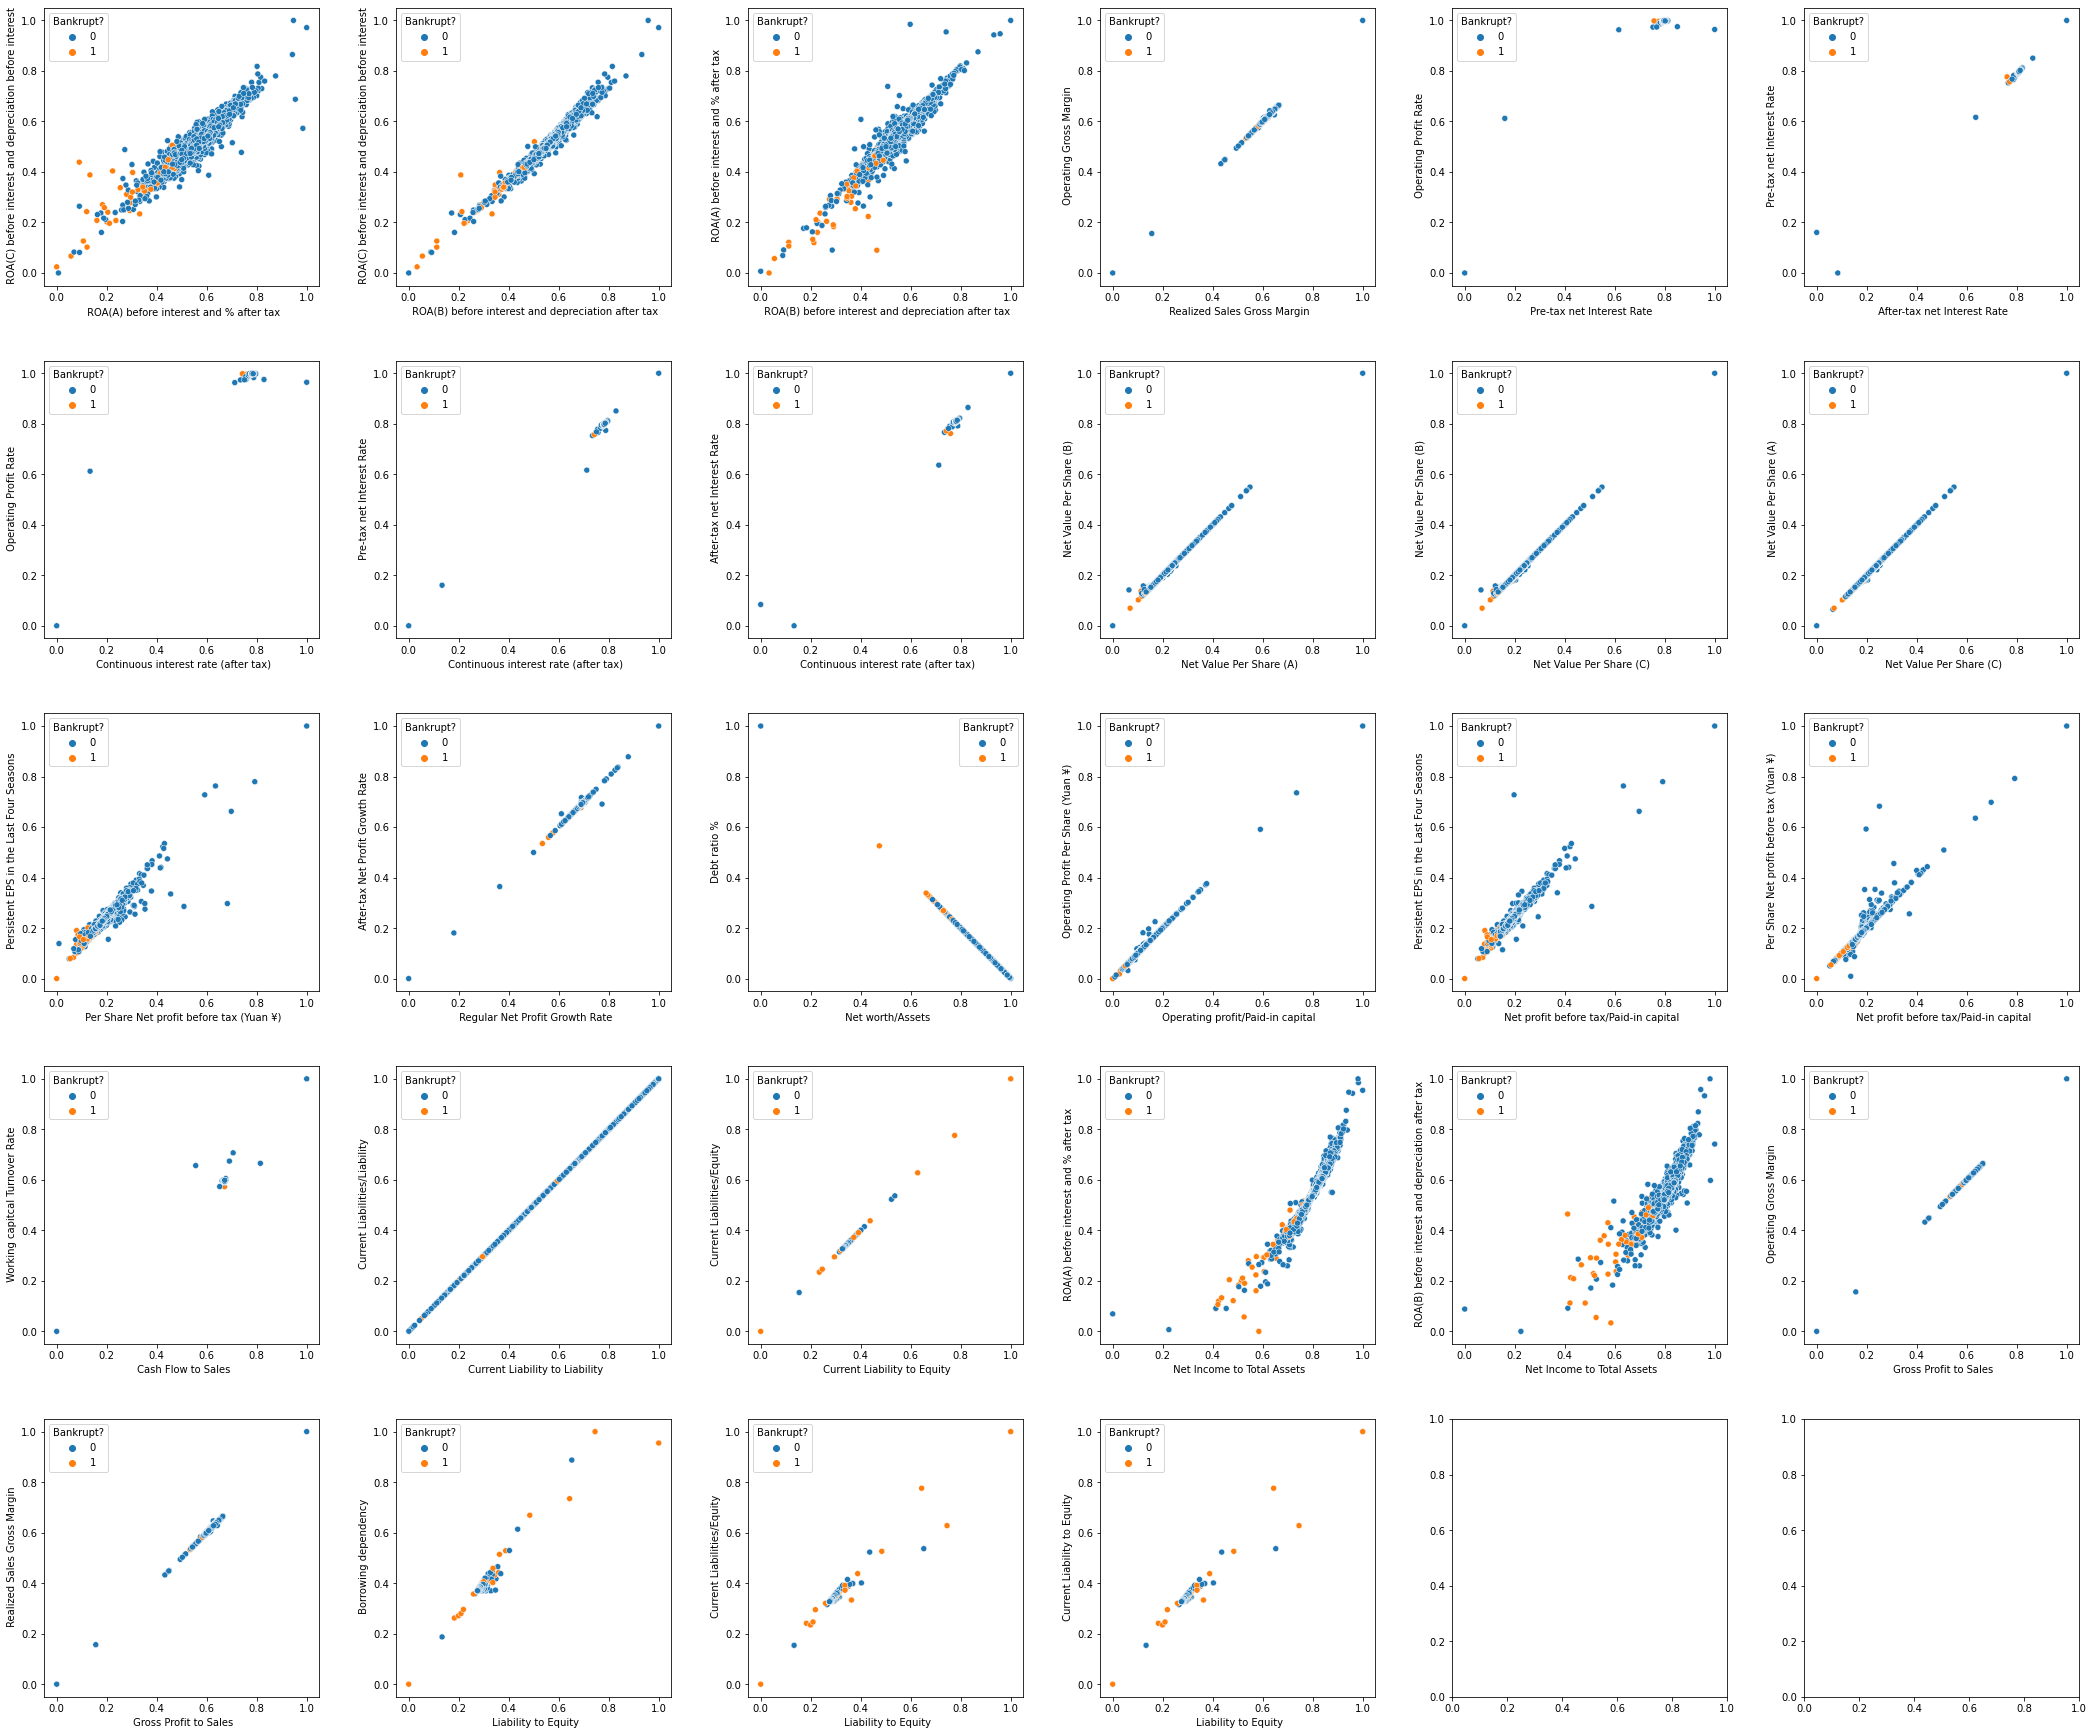

In [26]:
# plotting identified features with hue as 'Bankrupt?'
fig, ax = plt.subplots(5,6,figsize=(30,25))

for variable, subplot in zip(correlated_features, ax.flatten()):
    z = sns.scatterplot(df1[variable[0]],df1[variable[1]], hue = df['Bankrupt?'], ax = subplot)
    plt.tight_layout(pad=4.0)
    
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>We see multiple relatioships from our Bivariate and multivariate analysis, we analyse these relationships in details in the next section.
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Summary'></a>
# Data Analysis and EDA Inferences

### Univarite Analysis

1. We found that Nett income flag and Liability assets flag would be insignificnt for further analysis as they're not rich with information.
<br>
<br>
2. There are way more healthy firms than Bankrupt in the target feature, pointing to the fact that there might be a need for up-sampling.
<br>
<br>
3. Most of the features are highly skewed and leptokurtic, median would be a better measure of central tendency and transformation techniques need to be applied.
<br>
<br>
4. Most features are rich in outliers, some of the features also have incorrect values/mistakes at the far end. Removing/treating these outliers might help increase accuracy of our models. There are quiet a few approaches we could take to treat them. One method thats gaining attraction in the industry is the KNNimputer. We could also remove all the outliers or we could impute them with the median values of the features. We could also take out values that seem like mistakes i.e. greater than 1 for some of the financial ratios and try different transformation techniques on the resultant data. Another way to treat the outliers could be by imputing them with median of healthy and bankrupt firms of that column i.e. imputing outlier values of a feature that fall under bankruptcy with median of the values of that feature that fall under bankrupt firms and the same for healthy firms
<br>
<br>
5. There are no null Values in any of the columns

### Scaling and Transformation

As most of the data is ranged between 0 - 1, we can use min-max scalling for columns that are not contained within this range if needed during modelling, it should be kept in mind that this will not help treat outliers/skewness but only bring everything to scale.

We can apply log(x+1) transformation on the columns with skewness more than 1 or less than -1, we're suggesting log(x+1) because most of the values are really small to begin with and applying direct log might not yield desirable results

### Bivariate and Multivariate Analysis

#### - Correlation Analysis

We found that alot of the independent variables are correlated with each other pointing to moderate-high multicolinearity, we identified 77 distinct pairs of independent features that had correlation greater than 0.7 or less than -0.7.

#### - Ind-Dep Feature Bar Charts

We plotted bar charts with `Bankrupt?` on x-axis and median of each independent feature on y-axis separately to see whether there were any clear relationships we could identify, we found that

- Companies with low `Research and development expense rate`,`Tax rate (A)`,`Quick Ratio`,`Cash/Total Assets`,`Quick Assets/Current Liability` and `Cash/Current Liability` tend to go bankrupt.
- Companies with high `Total debt/Total net worth`, `Inventory Turnover Rate (times)`,`Fixed Assets Turnover Frequency`,`Allocation rate per person`,`Current Liability to Assets`,`Long-term Liability to Current Assets`,`Quick Asset Turnover Rate`,`Current Liability to Current Assets` and `Total assets to GNP price1` tend to go bankrupt.

#### - Scatterplots Of Extremly Correlated Features

We plotted scatterplots for extremely correlated features(corr > .90) with hue as bankruptcy to see whether there are any evident clusters, we found that

- Companies with low `Nett value per share(A,B&C)` tend to go bankrupt
- Companies with low `Persistent EPS in the Last Four Seasons`,`Per Share Net profit before tax (Yuan ¥)`,`Net profit before tax/Paid-in capital` tend to go bankrupt.

<a id='Data_preaparation'></a>
## 4.2 Data Preparation & Feature Engineering

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is a process of cleansing data to get it ready for modelling.  <br><br>
                        We will follow the steps mentioned below to prepare the dataset:-<br>
                        1. Remove redundant columns based on Domain knowledge  <Br>
                        2. Remove outliers using IQR method   <br>                       
                        3. Impute null values created due to outliers removal<br>
                        4. Reduce mutlicolinearity using Variance Inflation Factor<br>
                        5. Transform skewed variables<br>
                        6. Train - Test split                                                         </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Domain_removal'></a>
### 4.2.1 Removal of redundant features based on Domain knowledge

In [11]:
# copying df1
df2 = df1.copy()

In [12]:
# eliminating redundant columns based on domain knowledge
remove = [' ROA(A) before interest and % after tax',' ROA(B) before interest and depreciation after tax',
         ' Operating Gross Margin',' Realized Sales Gross Margin',' Net Value Per Share (A)',
          ' Net Value Per Share (C)',' Continuous interest rate (after tax)',
          ' Per Share Net profit before tax (Yuan ¥)',' Operating Profit Per Share (Yuan ¥)',
          ' Total Asset Turnover',' Debt ratio %', ' Current Liability to Liability',' Current Liability to Equity']

df2 = df2.drop(remove,axis=1)
df2.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Operating Expense Rate   Research and development expense rate  \
0                 0.000126                                0.000000   
1                 0.000290                                0.000000   
2                 0.000236                         25500000.000000   
3                 0.000108                                0.000000   
4        7890000000.000000                                0.000000   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.458143                              0.000725       0.000000   
1         0.461867                              0.000647       0.000000   
2         0.458521                              0.000790       0.000000   
3         0.465705                              0.000449       0.000000   
4         0.462746                              0.000686       0.000000   

    Net Value Per Share (B)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.177911                                  0.180581   
3                  0.154187                                  0.193722   
4                  0.167502                                  0.212537   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0              0.311664                     0.017560   
1              0.318137                     0.021144   
2              0.307102                     0.005944   
3              0.321674                     0.014368   
4              0.319162                     0.029690   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.022102                       0.848195   
1                                  0.022080                       0.848088   
2                                  0.022760                       0.848094   
3                                  0.022046                       0.848005   
4                                  0.022096                       0.848258   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                           0.688979                         0.688979   
1                           0.689693                         0.689702   
2                           0.689463                         0.689470   
3                           0.689110                         0.689110   
4                           0.689697                         0.689697   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                            0.217535         4980000000.000000   
1                            0.217620 

In [13]:
# checking the shape
df2.shape

(6819, 81)

<a id='Outlier_removal'></a>
### 4.2.2 Outlier Removal using IQR

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets remove outliers using the IQR method.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# eliminating outliers using IQR
for i in df2.drop('Bankrupt?',axis = 1).columns:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)
    df2[i] = df2[i][(df2[i]<upper) & (df2[i]>lower)]

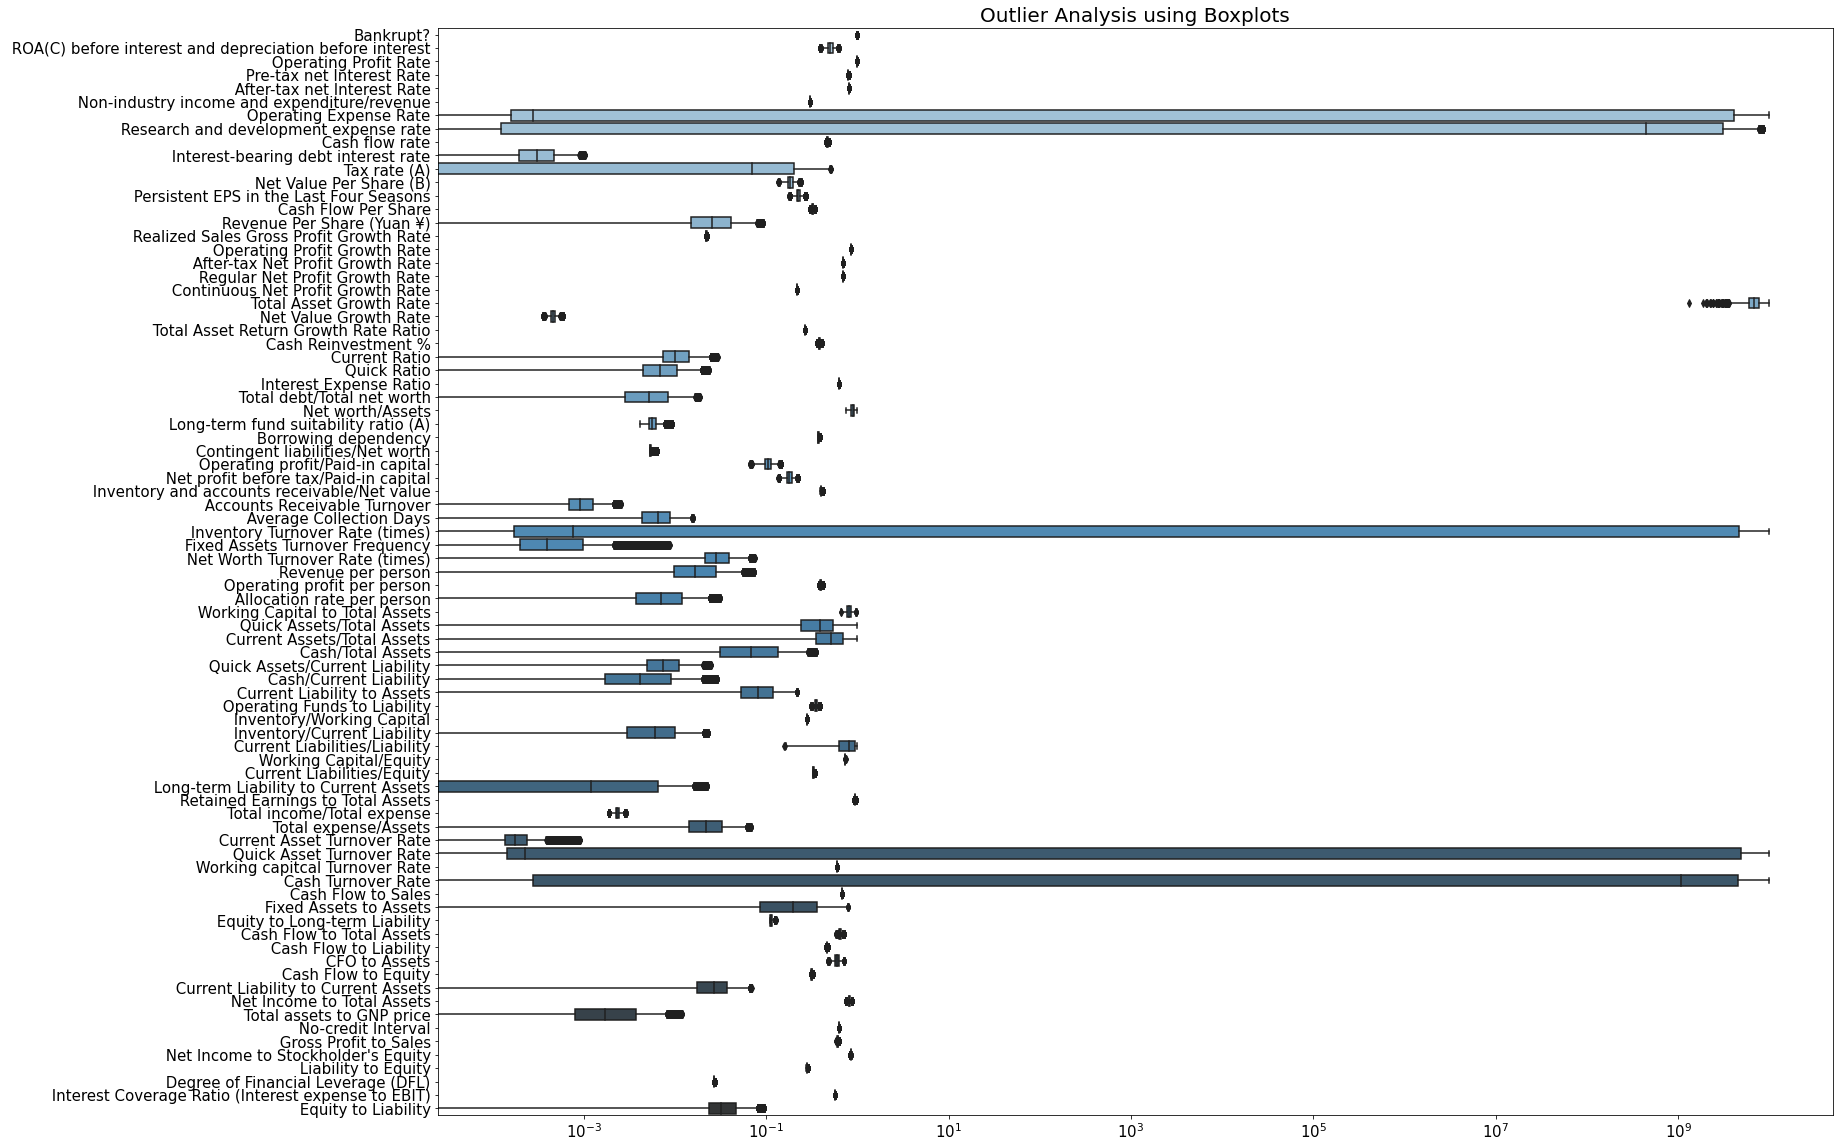

In [15]:
# looking at the boxplots again
plt.figure(figsize = (25,20))
ax =sns.boxplot(data = df2, orient="h",palette='Blues_d')
ax.set_title('Outlier Analysis using Boxplots', fontsize = 20)
ax.set(xscale="log")
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>As we can see all the outliers have been removed. We can see new outliers which is expected.
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Outlier_treatment'></a>
### 4.2.3 Null value treatment

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets treat the null values resulting from removal of outliers.  <br><br>
                        We will follow the steps mentioned below to treat null values:-<br>
                        1. Find features with high null values and see if they can be dropped  <Br>
                        2. Transform the skewed columns using square root transformation<br>
                        3. Scale the data to get it ready for KNN imputation.<Br>                    
                        4. Impute null values using KNNImputer<br>
                        5. Plot the medians to see if there's any deviation<br>
                                                            </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# finding features with high null values
nulls = df2.isnull().sum()/len(df2) * 100
nulls[nulls>20]

 Total Asset Growth Rate                              20.252236
 Fixed Assets Turnover Frequency                      20.794838
 Current Asset Turnover Rate                          20.516205
 Degree of Financial Leverage (DFL)                   22.041355
 Interest Coverage Ratio (Interest expense to EBIT)   20.838833
dtype: float64

In [17]:
#copying the dataset
df3 = df2.copy()

In [18]:
# transforming skewed columns using square root transformatin
for i in df3.columns[1:]:
    if abs(df3[i].skew()) > 1:
        print(i,'skewness before tansformation =',df3[i].skew())
        df3[i] = np.sqrt(df3[i])
        print(i,'skewness after tansformation =',df3[i].skew())
        print()

 Operating Expense Rate skewness before tansformation = 1.2486733165601693
 Operating Expense Rate skewness after tansformation = 0.9704917487673127

 Research and development expense rate skewness before tansformation = 1.2223584686011266
 Research and development expense rate skewness after tansformation = 0.5230365802827721

 Long-term fund suitability ratio (A) skewness before tansformation = 1.516058058822089
 Long-term fund suitability ratio (A) skewness after tansformation = 1.3681217333454307

 Borrowing dependency skewness before tansformation = 1.0178093388205238
 Borrowing dependency skewness after tansformation = 1.0083829140276173

 Contingent liabilities/Net worth skewness before tansformation = 2.064014083541369
 Contingent liabilities/Net worth skewness after tansformation = 2.035971865396791

 Inventory Turnover Rate (times) skewness before tansformation = 1.1372886202283368
 Inventory Turnover Rate (times) skewness after tansformation = 0.8098361672667492

 Fixed Asse

In [19]:
# performing min-max normalisation
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df3.iloc[:,1:] = minmax.fit_transform(df3.iloc[:,1:])
df3.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                                nan          
1          1                                           0.323408          
2          1                                           0.161290          
3          1                                           0.050041          
4          1                                           0.326510          

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.374509                         nan   
1                0.328100                    0.367647   
2                0.151004                         nan   
3                     nan                         nan   
4                0.382360                    0.349354   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                           nan                                           nan   
1                      0.358432                                      0.565394   
2                           nan                                           nan   
3                           nan                                      0.129771   
4                      0.363203                                      0.393893   

    Operating Expense Rate   Research and development expense rate  \
0                 0.000000                                0.000000   
1                 0.000000                                0.000000   
2                 0.000000                                0.054421   
3                 0.000000                                0.000000   
4                 0.888701                                0.000000   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.283229                              0.706628       0.000000   
1         0.382014                              0.630604       0.000000   
2         0.293241                              0.769981       0.000000   
3         0.483825                              0.437622       0.000000   
4         0.405331                              0.668616       0.000000   

    Net Value Per Share (B)   Persistent EPS in the Last Four Seasons  \
0                  0.124745                                       nan   
1                  0.456584                                  0.315015   
2                  0.414594                                  0.020608   
3                  0.185079                                  0.157017   
4                  0.313901                                  0.352306   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0              0.235151                     0.190110   
1              0.384052                     0.228918   
2              0.130187                     0.064352   
3              0.465419                     0.155559   
4              0.407648                     0.321434   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.481353                       0.757374   
1                                  0.418942                       0.563321   
2                                       nan                       0.574425   
3                                  0.322671                       0.414024   
4                                  0.463374                       0.871888   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                           0.182271                         0.181879   
1                           0.655577                         0.661253   
2                           0.502843                         0.507239   
3                           0.268563                         0.268213   
4                           0.658219                         0.658055   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                            0.111907                  0.422145   
1                            0.614004 

In [20]:
# using optimal n_neighbors to impute null values
impute = KNNImputer(n_neighbors=5)
df3_treated = df3.copy()
df3_treated[:] = impute.fit_transform(df3)
df3_treated.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0   1.000000                                           0.203722          
1   1.000000                                           0.323408          
2   1.000000                                           0.161290          
3   1.000000                                           0.050041          
4   1.000000                                           0.326510          

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.374509                    0.151650   
1                0.328100                    0.367647   
2                0.151004                    0.089096   
3                0.153914                    0.108429   
4                0.382360                    0.349354   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.127733                                      0.343308   
1                      0.358432                                      0.565394   
2                      0.243352                                      0.152061   
3                      0.143912                                      0.129771   
4                      0.363203                                      0.393893   

    Operating Expense Rate   Research and development expense rate  \
0                 0.000000                                0.000000   
1                 0.000000                                0.000000   
2                 0.000000                                0.054421   
3                 0.000000                                0.000000   
4                 0.888701                                0.000000   

    Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
0         0.283229                              0.706628       0.000000   
1         0.382014                              0.630604       0.000000   
2         0.293241                              0.769981       0.000000   
3         0.483825                              0.437622       0.000000   
4         0.405331                              0.668616       0.000000   

    Net Value Per Share (B)   Persistent EPS in the Last Four Seasons  \
0                  0.124745                                  0.136408   
1                  0.456584                                  0.315015   
2                  0.414594                                  0.020608   
3                  0.185079                                  0.157017   
4                  0.313901                                  0.352306   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0              0.235151                     0.190110   
1              0.384052                     0.228918   
2              0.130187                     0.064352   
3              0.465419                     0.155559   
4              0.407648                     0.321434   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.481353                       0.757374   
1                                  0.418942                       0.563321   
2                                  0.317425                       0.574425   
3                                  0.322671                       0.414024   
4                                  0.463374                       0.871888   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                           0.182271                         0.181879   
1                           0.655577                         0.661253   
2                           0.502843                         0.507239   
3                           0.268563                         0.268213   
4                           0.658219                         0.658055   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                            0.111907                  0.422145   
1                            0.614004 

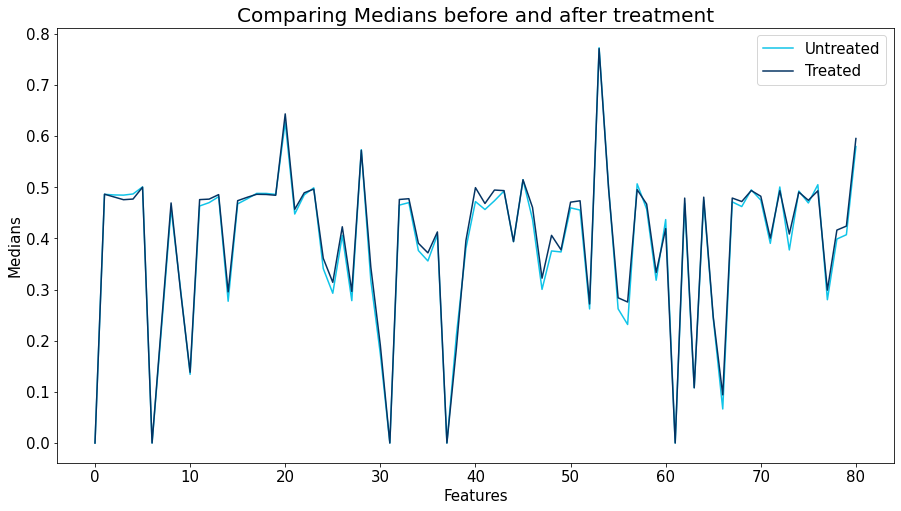

In [21]:
# plotting medians to see deviations

# plotting untreated data
sns.lineplot(list(range(81)),df3.median(), color='#10c4e8' , label = 'Untreated')

# plotting treated data

sns.lineplot(list(range(81)),df3_treated.median(), color='#053463', label = 'Treated')

# adding a title
plt.title('Comparing Medians before and after treatment',fontsize = 20)
# adding y-axis label
plt.ylabel('Medians', fontsize = 15)
# adding x-axis label
plt.xlabel('Features', fontsize = 15)

plt.legend()

plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Null value treatment summary and inferences:<br>
                        1. There were 4 features with above 20% null values but not high enough to be dropped  <Br>
                        2. With n_neighbors for KNN imputation as 5, we imputed the nan values. <br>                       
                        3. Ploting the medians showed us that the treated dataset roughly overlaps the untreated dataset, pointing to the fact that the orignal dataset has been preserved.<br>
                                                            </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read more about the KNNImputer and why is it gaining traction in the Data Science community :</b> <br><br>
                    <a href="https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/">KNNImputer: A robust way to impute missing values (using Scikit-Learn) <br>
                   </font>
            </div>
        </td>
    </tr>
</table>


<a id='vif'></a>
### 4.2.4 Multicolinearity reduction

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets find the features exhibiting high multicolinearity using Variance Inflation Factor and remove them
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# preparing data for VIF filtering
const = pd.DataFrame(np.ones(df3_treated.shape[0]),columns=['intercept']) # creating a constant
X = df3_treated.drop('Bankrupt?',axis = 1) # independent variables

X.insert(loc = 0, column = 'intercept', value = const) # adding constant

# automating vif filtering process
cols = list(X.columns)
while len(cols) > 0:
    vif_df = pd.DataFrame()
    num = X[cols]
    vif_df['Features'] = num.columns
    vif_df['VIF'] = [vif(num.values,i) 
              for i in range(len(num.columns))]
    vif_df.set_index('Features',inplace=True)
    feature_max = vif_df.iloc[1:].idxmax()
    max_vif = max(vif_df['VIF'][1:])
    if max_vif > 5:
        cols.remove(feature_max.values)
        print('Feature with high vif:', feature_max.values[0],', VIF:', max_vif)

    else:
        break

Feature with high vif:  Liability to Equity , VIF: 572.120896078477
Feature with high vif:  Regular Net Profit Growth Rate , VIF: 85.50442245943357
Feature with high vif:  Current Assets/Total Assets , VIF: 73.49179139791987
Feature with high vif:  Quick Assets/Current Liability , VIF: 47.00193212926744
Feature with high vif:  Net worth/Assets , VIF: 36.282349677694874
Feature with high vif:  Working Capital to Total Assets , VIF: 29.341823809834885
Feature with high vif:  Pre-tax net Interest Rate , VIF: 25.78202182071459
Feature with high vif:  Net profit before tax/Paid-in capital , VIF: 24.646853347608154
Feature with high vif:  Current Liability to Assets , VIF: 23.965734134599696
Feature with high vif:  Net Income to Total Assets , VIF: 23.6283388270775
Feature with high vif:  Current Liabilities/Equity , VIF: 18.293768490145236
Feature with high vif:  Current Ratio , VIF: 15.167108116199229
Feature with high vif:  Persistent EPS in the Last Four Seasons , VIF: 14.087195082276004

In [23]:
# remvoing features with high VIF
cols = ['Bankrupt?']
cols.extend(vif_df.index[1:])
df4 = df3_treated.loc[:,cols]
df4.shape

(6819, 48)

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>Columns with VIF > 5 have been removed. There are 48 columns remaining.
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='train_test'></a>
### 4.2.5 Train-Test split

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Lets perform the Train-Test split using following steps:-<br>
                        1. Specify Target and predictor variables.<br>
                        2. Call train_test_split from sklearn and perform the split.<br>
                        3. Print the shapes of all the splits.<br>                                               
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# specifying target and predictor variables
X = df4.drop('Bankrupt?',axis = 1)
y = df4['Bankrupt?']
Xc = sm.add_constant(X)

In [25]:
# performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.3, random_state=42)

In [26]:
# printing shapes of the splits
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4773, 48)
(4773,)
(2046, 48)
(2046,)


<a id='Modeling'></a>
# 5. Modeling

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Our Data analysis and preparation is complete, now we move onto the next stage where we construct predictive models using various predictive algorithms and select the best one for deployment. Our aim is to maximise recall as letting unhealthy companies slip by is more costly than classifying some of the healthy companies as unhealthy.  <br><br>
                        We will explore and optimise the following models:-<br>
                        1. Logistic Regression(Maximum likelyhood estimation) <Br>
                        2. Decision Tree  <br>                       
                        3. Random Forest<br>
                        4. K-Nearest Neighbors<br>
                        5. Naïve Bayes<br>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='logit'></a>
## 5.1 Logistic Regression(MLE)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We will follow the following steps for Logisitc Regression:-<br>                        
                        1. Build a full Logistic Regression model using Maximum likelyhood estimation<Br>
                        2. Plot Receiver Operating Characteristic(ROC) and get Area under Curve(AUC)<br>
                        3. Build scorecard to see how different metrics like Precision, Recall, F1-score and kappa are performing under different thresholds.<br>
                        4. Perform recursive feature elimination(RFE)<br>
                        5. Build a model with features that survived RFE.<br>
                        6. Repeat steps 2 and 3 for RFE model<br>
                        7. Compare both models<br>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='logit_full'></a>
### 5.1.1 Full model

In [27]:
# building full model
model = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.071186
         Iterations 11


In [28]:
# comparing train and test ROC scores
y_train_prob = model.predict(X_train)

print('Train ROC-AUC:', roc_auc_score(y_train,y_train_prob))

y_test_prob = model.predict(X_test)

print('Test ROC-AUC:', roc_auc_score(y_test,y_test_prob))

Train ROC-AUC: 0.949939325002053
Test ROC-AUC: 0.9555972482801751


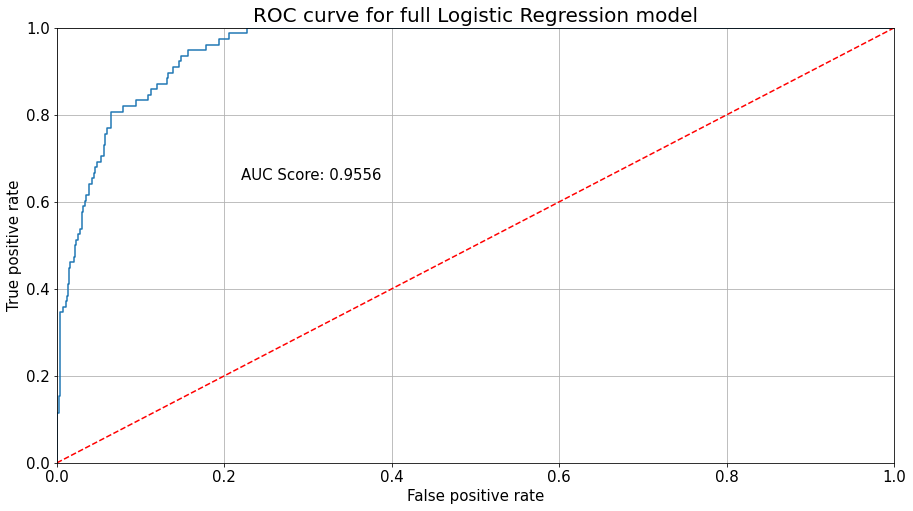

In [29]:
# getting predictions for test data
y_prob = model.predict(X_test)

# getting fpr,tpr for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plotting the ROC curve
plt.plot(fpr, tpr)

# setting limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model(Junk model)
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for full Logistic Regression model', fontsize = 20)
plt.xlabel('False positive rate', fontsize = 15)
plt.ylabel('True positive rate', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.22, y = 0.65, s = 'AUC Score: '+ str(round(metrics.roc_auc_score(y_test, y_prob),4)))
                               
# plot the grid
plt.grid(True)

In [30]:
# building threshold scorecard
thresh_score = pd.DataFrame(columns=['Threshold','Precision','Recall','F1-score','Kappa'])

def cal_score(model,thresh):
    y_prob = model.predict(X_test)
    y_pred = [0 if x<thresh else 1 for x in y_prob]
    global thresh_score
    thresh_score = thresh_score.append({'Threshold': thresh,                                    
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'F1-score': metrics.f1_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [31]:
# calculating metrics for different threshs'
values = np.linspace(0.1,0.9,9)
for i in values:
    cal_score(model,i)

thresh_score

Threshold  Precision   Recall  F1-score    Kappa
0   0.100000   0.335294 0.730769  0.459677 0.429880
1   0.200000   0.423077 0.564103  0.483516 0.459989
2   0.300000   0.473684 0.461538  0.467532 0.446713
3   0.400000   0.566038 0.384615  0.458015 0.440764
4   0.500000   0.771429 0.346154  0.477876 0.465247
5   0.600000   0.750000 0.230769  0.352941 0.341121
6   0.700000   0.714286 0.128205  0.217391 0.208204
7   0.800000   0.692308 0.115385  0.197802 0.188968
8   0.900000   0.833333 0.064103  0.119048 0.114224

In [32]:
# creating function for youdens table
def youdens_table(tpr,fpr,thresholds):
    youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
    youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
    youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
    return youdens_table

In [33]:
# calling youdens_table
youdens_table(tpr,fpr,thresholds).head()

TPR      FPR  Threshold  Difference
0 0.948718 0.157012   0.020431    0.791706
1 0.935897 0.148374   0.022779    0.787523
2 0.961538 0.177846   0.016046    0.783693
3 0.987179 0.205285   0.011671    0.781895
4 0.974359 0.193089   0.013839    0.781270

In [34]:
# adding thresh where tpr-fpr is maximum to the score board
cal_score(model,0.020431)
thresh_score

Threshold  Precision   Recall  F1-score    Kappa
0   0.100000   0.335294 0.730769  0.459677 0.429880
1   0.200000   0.423077 0.564103  0.483516 0.459989
2   0.300000   0.473684 0.461538  0.467532 0.446713
3   0.400000   0.566038 0.384615  0.458015 0.440764
4   0.500000   0.771429 0.346154  0.477876 0.465247
5   0.600000   0.750000 0.230769  0.352941 0.341121
6   0.700000   0.714286 0.128205  0.217391 0.208204
7   0.800000   0.692308 0.115385  0.197802 0.188968
8   0.900000   0.833333 0.064103  0.119048 0.114224
9   0.020431   0.193211 0.948718  0.321041 0.275123

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>1. Our full Logistic Regression(MLE) model gave us an ROC of 0.9555.<br>
                         2. Maximum precision was 0.833333 at thresholds 0.9<br>
                         3. Maximum Recall was 0.948718 at threshold 0.020431 obtained through youdens index.<br>
                         4. Maximum F1 was 0.483516 at threshold 0.2<br>
                         5. Maximum kappa was 0.459989 at threshod 0.2
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='logit_RFE'></a>
### 5.1.2 Recursive Feature Elimination : Logistic Regression

In [35]:
# choosing best features through RFE cross validation
lor = LogisticRegression(fit_intercept=False)
rfecv = RFECV(lor,cv = 3, scoring = 'roc_auc')
rfecv.fit(Xc,y)

RFECV(cv=3, estimator=LogisticRegression(fit_intercept=False),
      scoring='roc_auc')

In [36]:
# printing best features
rfecv.n_features_

26

In [37]:
# converting the rank into a dataframe for column extraction
rfecv_df = pd.DataFrame(rfecv.ranking_,index = X_train.columns, columns=['Select'])

In [38]:
# extracting columns
cols = rfecv_df[rfecv_df['Select']==1].index
cols = cols.insert(loc = 0, item='const')

In [39]:
# building model with best features
model_logit_rfe = sm.Logit(y_train,X_train[cols]).fit()

Optimization terminated successfully.
         Current function value: 0.072575
         Iterations 10


In [40]:
# comparing train and test ROC scores
y_train_prob = model_logit_rfe.predict(X_train[cols])

print('Train-AUC:', roc_auc_score(y_train,y_train_prob))

y_test_prob = model_logit_rfe.predict(X_test[cols])

print('Test-AUC:', roc_auc_score(y_test,y_test_prob))

Train-AUC: 0.9474195638091125
Test-AUC: 0.9593105065666041


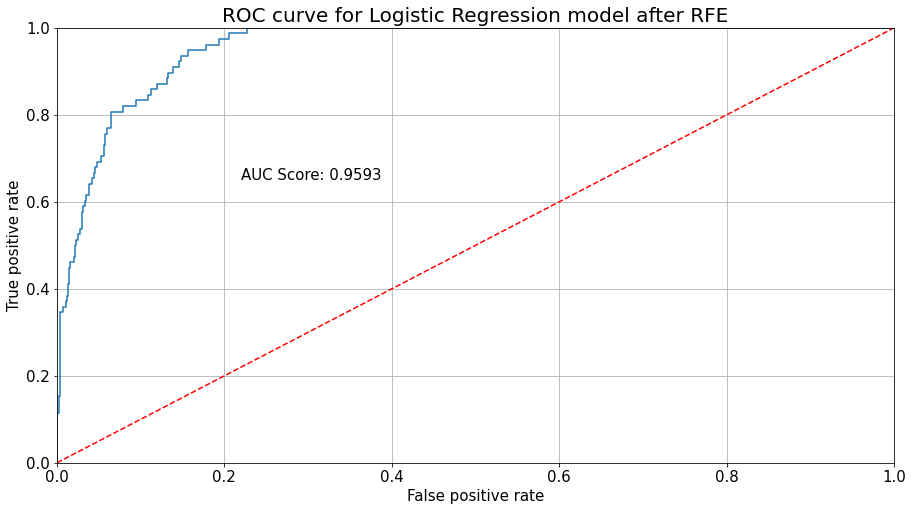

In [41]:
# getting predictions for test data
y_prob_logit_rfe = model_logit_rfe.predict(X_test[cols])

# getting fpr,tpr for ROC curve
fpr_logit_rfe, tpr_logit_rfe, thresholds_logit_rfe = roc_curve(y_test, y_prob_logit_rfe)

# plotting the ROC curve
plt.plot(fpr, tpr)

# setting limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model(Junk model)
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Logistic Regression model after RFE', fontsize = 20)
plt.xlabel('False positive rate', fontsize = 15)
plt.ylabel('True positive rate', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.22, y = 0.65, s = 'AUC Score: '+ str(round(metrics.roc_auc_score(y_test, y_prob_logit_rfe),4)))
                               
# plot the grid
plt.grid(True)

In [42]:
# making RFE thresh scoreboard
thresh_score_logit_rfe = pd.DataFrame(columns=['Threshold','Precision','Recall','F1-score','Kappa'])

def cal_score2(model,thresh):
    y_prob = model.predict(X_test[cols])
    y_pred = [0 if x<thresh else 1 for x in y_prob]
    global thresh_score_logit_rfe
    thresh_score_logit_rfe = thresh_score_logit_rfe.append({'Threshold': thresh,                                    
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'F1-score': metrics.f1_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [43]:
# checking metrics at different thresholds
values = np.linspace(0.1,0.9,9)
for i in values:
    cal_score2(model_logit_rfe,i)

thresh_score_logit_rfe

Threshold  Precision   Recall  F1-score    Kappa
0   0.100000   0.331429 0.743590  0.458498 0.428349
1   0.200000   0.428571 0.576923  0.491803 0.468554
2   0.300000   0.500000 0.500000  0.500000 0.480183
3   0.400000   0.600000 0.384615  0.468750 0.452442
4   0.500000   0.685714 0.307692  0.424779 0.410866
5   0.600000   0.782609 0.230769  0.356436 0.345064
6   0.700000   0.733333 0.141026  0.236559 0.227054
7   0.800000   0.800000 0.102564  0.181818 0.174667
8   0.900000   0.833333 0.064103  0.119048 0.114224

In [44]:
# calling_youdens table
youdens_table(tpr_logit_rfe,fpr_logit_rfe,thresholds_logit_rfe).head()

TPR      FPR  Threshold  Difference
0 0.974359 0.159553   0.020815    0.814806
1 0.961538 0.148374   0.023002    0.813164
2 0.935897 0.125508   0.030921    0.810389
3 0.948718 0.144817   0.024093    0.803901
4 0.923077 0.120427   0.034413    0.802650

In [45]:
# adding thresh where tpr-fpr is maximum to the score board 
cal_score2(model_logit_rfe,0.020815)
thresh_score_logit_rfe

Threshold  Precision   Recall  F1-score    Kappa
0   0.100000   0.331429 0.743590  0.458498 0.428349
1   0.200000   0.428571 0.576923  0.491803 0.468554
2   0.300000   0.500000 0.500000  0.500000 0.480183
3   0.400000   0.600000 0.384615  0.468750 0.452442
4   0.500000   0.685714 0.307692  0.424779 0.410866
5   0.600000   0.782609 0.230769  0.356436 0.345064
6   0.700000   0.733333 0.141026  0.236559 0.227054
7   0.800000   0.800000 0.102564  0.181818 0.174667
8   0.900000   0.833333 0.064103  0.119048 0.114224
9   0.020815   0.194872 0.974359  0.324786 0.278973

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>1. Our Logistic Regression model after RFE gave us an ROC of 0.9593 which is barely above our full model.<br>
                         2. Maximum precision was 0.833333 at threshold 0.9.<br>
                         3. Maximum Recall was 0.974359 at threshold 0.020815 obtained through youdens index.<br>
                         4. Maximum F1 was 0.5 at threshold 0.3<br>
                         5. Maximum kappa was 0.480183 at threshod 0.3
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='logit_comp'></a>
### 5.1.3 Model comparision : RFE vs Full

In [46]:
# making a composite thresh score card to compare performace
df_score = pd.concat([thresh_score,thresh_score_logit_rfe],keys = ['LoR full model','LoR RFE'])
df_score.head()

Threshold  Precision   Recall  F1-score    Kappa
LoR full model 0   0.100000   0.335294 0.730769  0.459677 0.429880
               1   0.200000   0.423077 0.564103  0.483516 0.459989
               2   0.300000   0.473684 0.461538  0.467532 0.446713
               3   0.400000   0.566038 0.384615  0.458015 0.440764
               4   0.500000   0.771429 0.346154  0.477876 0.465247

In [47]:
# finding out at which thresh and model Recall/TPR is maximised
df_score.sort_values(by = 'Recall',ascending = False).head()

Threshold  Precision   Recall  F1-score    Kappa
LoR RFE        9   0.020815   0.194872 0.974359  0.324786 0.278973
LoR full model 9   0.020431   0.193211 0.948718  0.321041 0.275123
LoR RFE        0   0.100000   0.331429 0.743590  0.458498 0.428349
LoR full model 0   0.100000   0.335294 0.730769  0.459677 0.429880
LoR RFE        1   0.200000   0.428571 0.576923  0.491803 0.468554

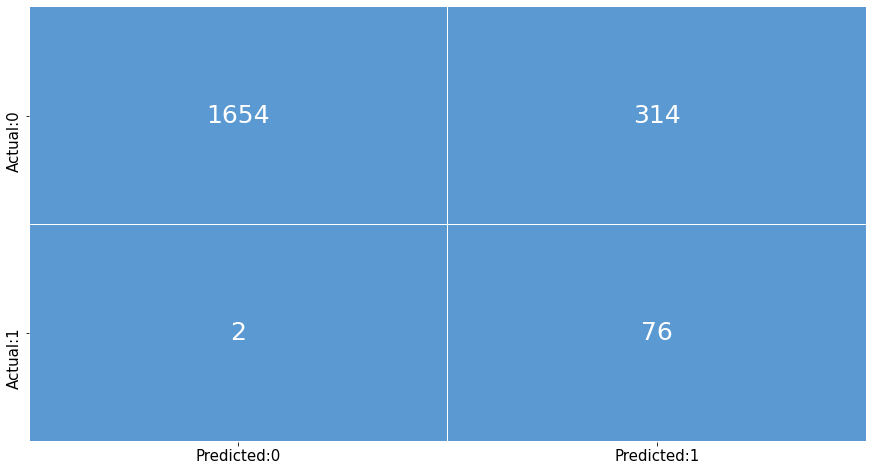

In [59]:
# plotting confusion matrix for selected logit model(RFE) and thresh
y_pred_rfe = [0 if x < 0.020815 else 1 for x in model_logit_rfe.predict(X_test[cols])]

cm = confusion_matrix(y_test, y_pred_rfe)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                           index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['#5a99d1']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.show()

In [58]:
# creating scorecard to compare models and adding best logit model
score_card = pd.DataFrame(columns=['Model Name','Threshold','ROC-AUC','Recall','Kappa'])

score_card = score_card.append({'Model Name': 'Logistic Regression with RFE',
                  'Threshold': 0.020815,
                  'ROC-AUC': roc_auc_score(y_test, y_prob_logit_rfe),
                  'Recall': metrics.recall_score(y_test,y_pred_rfe),
                  'Kappa': metrics.cohen_kappa_score(y_test,y_pred_rfe)}, ignore_index = True)
score_card

Model Name  Threshold  ROC-AUC   Recall    Kappa
0  Logistic Regression with RFE   0.020815 0.959311 0.974359 0.278973

<table align="left">
    <tr>
        <td width="8%">
            <img src="inter.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      <b>Our aim is to maximise recall as letting unhealthy companies slip by is more costly than classifying some of the healthy companies as unhealthy. Following that line of logic our recall is maximised with the RFE model at thresh 0.020815. Our best Logit model is the RFE model.
                    </b>        
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dtc'></a>
## 5.2 Decision Tree

In [ ]:
# # finding optimal n_neighbors
# for i in range(2,16):
#     impute = KNNImputer(n_neighbors=i)
#     full = impute.fit_transform(df3)
#     full = pd.DataFrame(full, columns=df3.columns)
#     print(i,'=',full.median().sum() - df3.median().sum())

In [ ]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 3.5 and 2 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1
    
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(10)

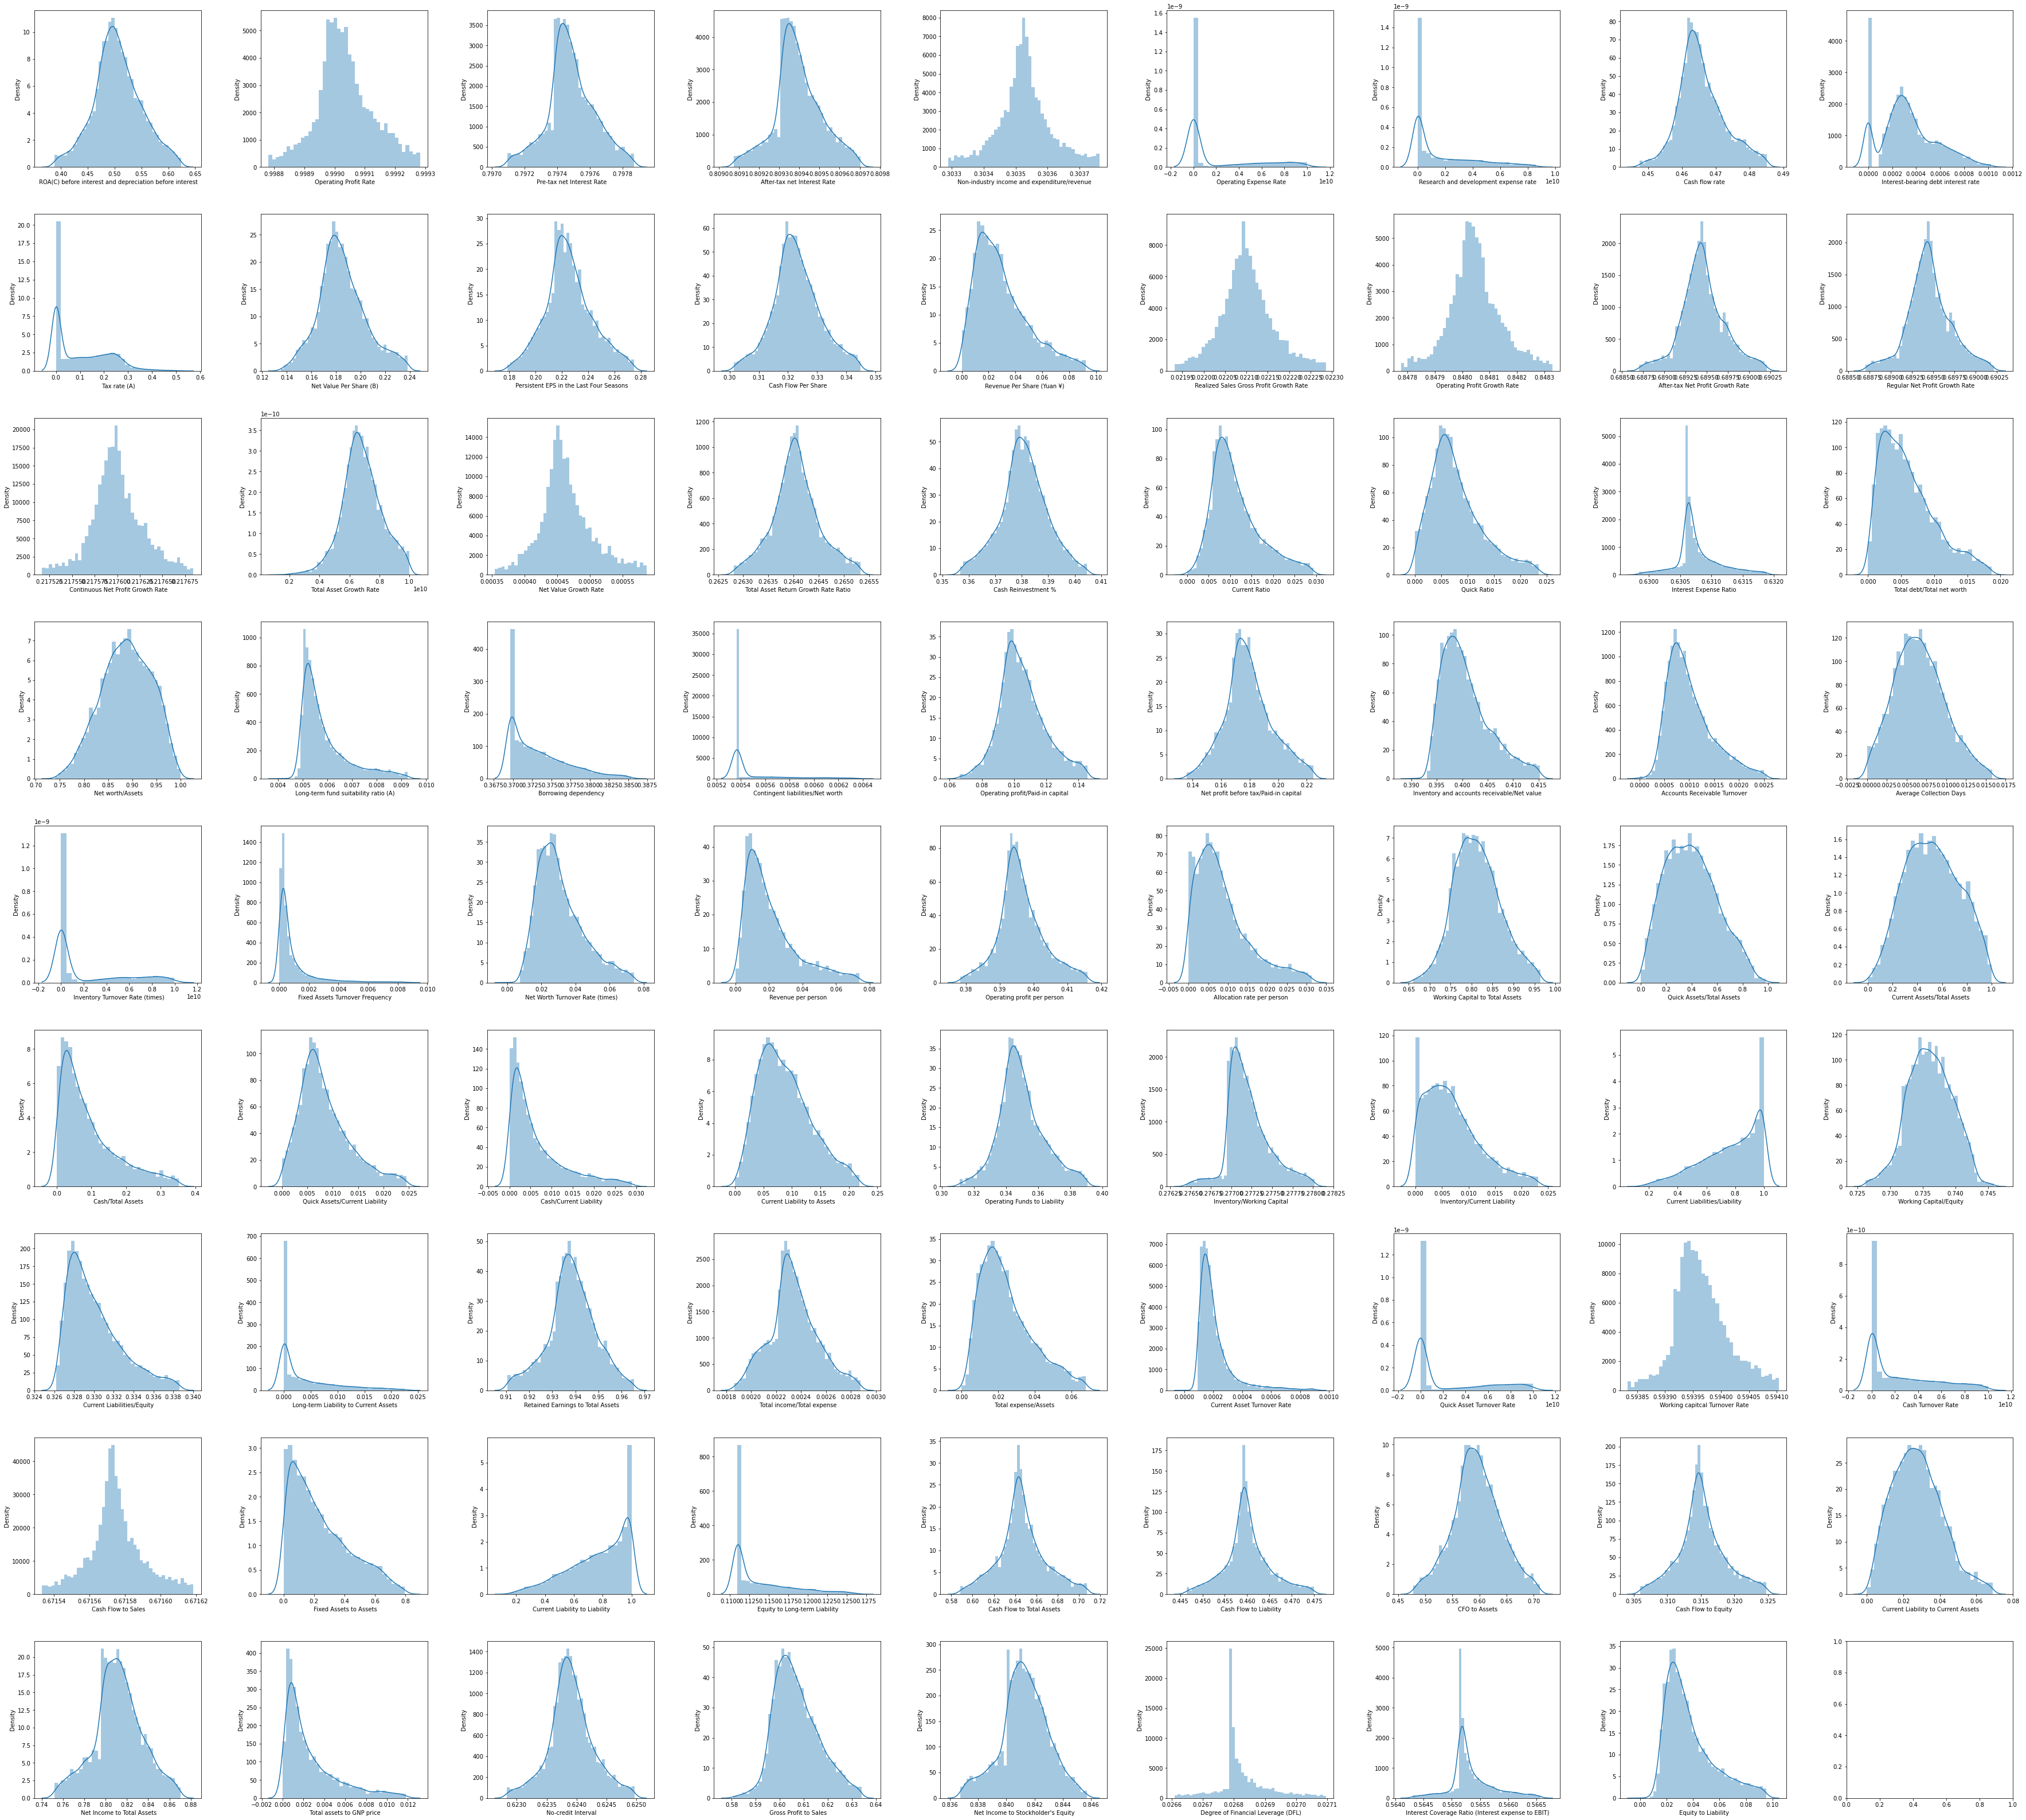

In [40]:
fig, ax = plt.subplots(nrows = 9, ncols= 9, figsize=(50,45))

for variable, subplot in zip(df2.columns[1:], ax.flatten()):
    z = sns.distplot(df2[variable], ax=subplot)
    plt.tight_layout(pad=4.0)
plt.show()

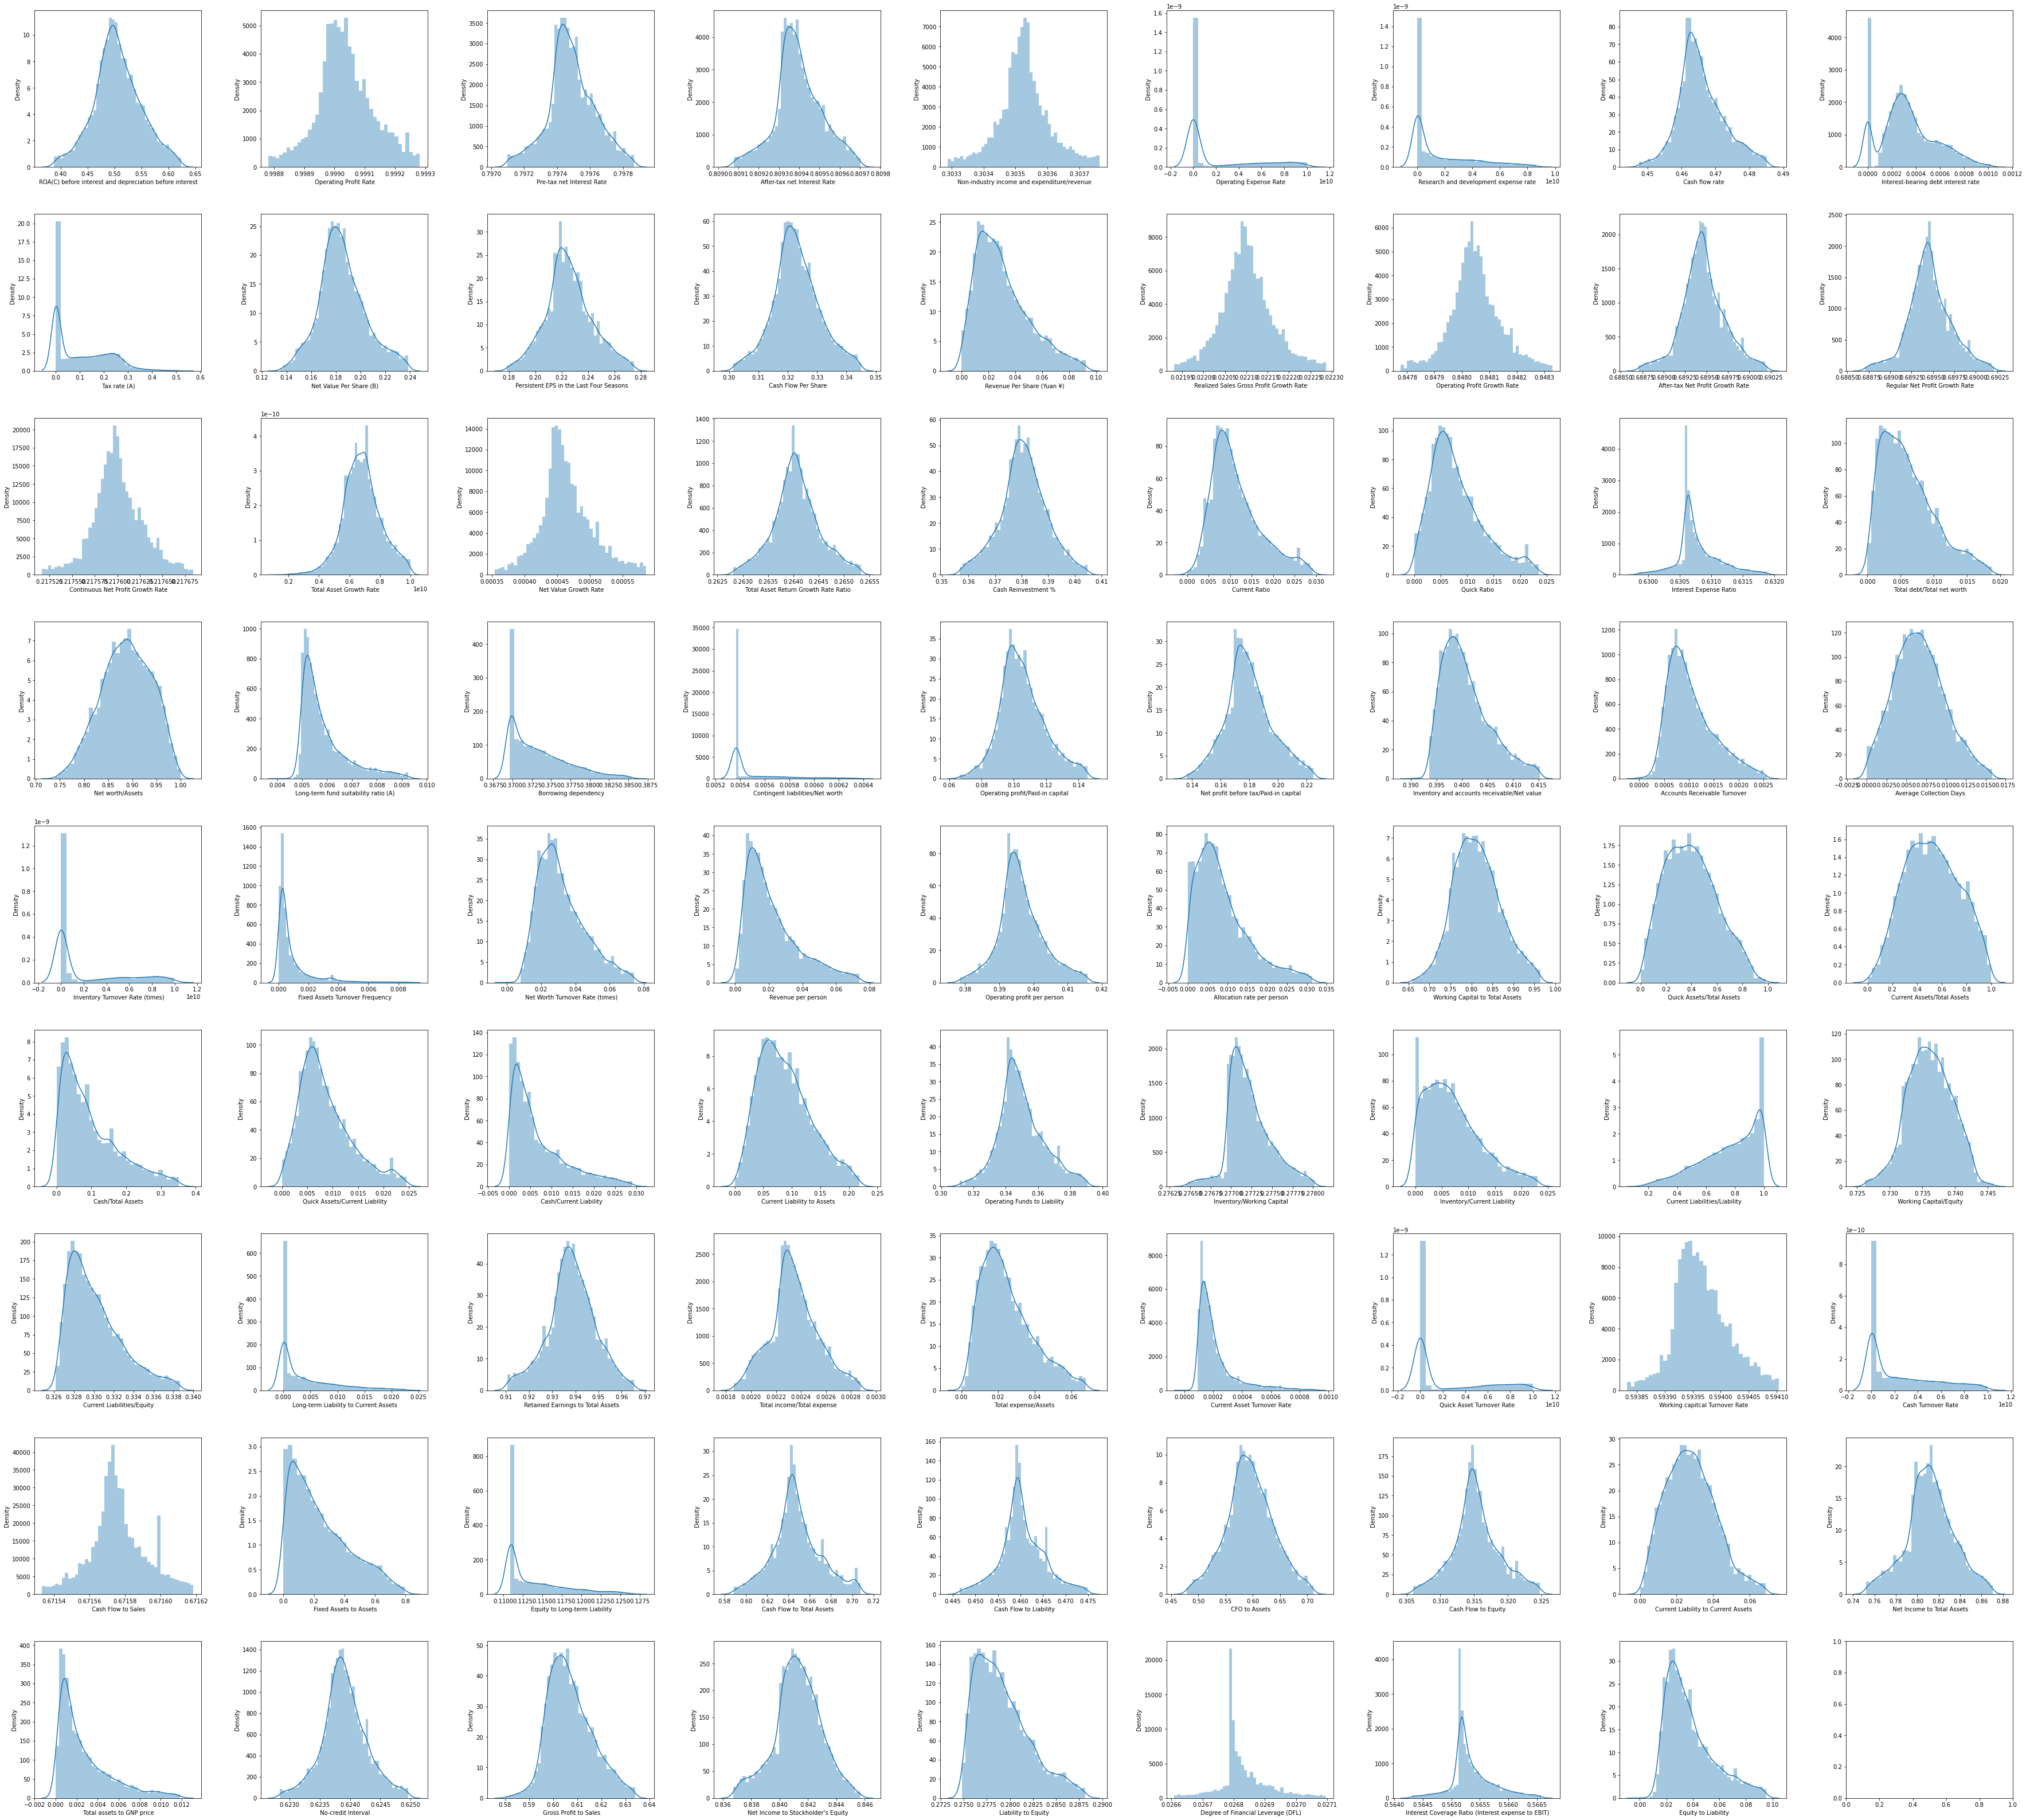

In [27]:
fig, ax = plt.subplots(nrows = 9, ncols= 9, figsize=(50,45))

for variable, subplot in zip(df2_treated.columns[1:], ax.flatten()):
    z = sns.distplot(df2_treated[variable], ax=subplot)
    plt.tight_layout(pad=4.0)
plt.show()

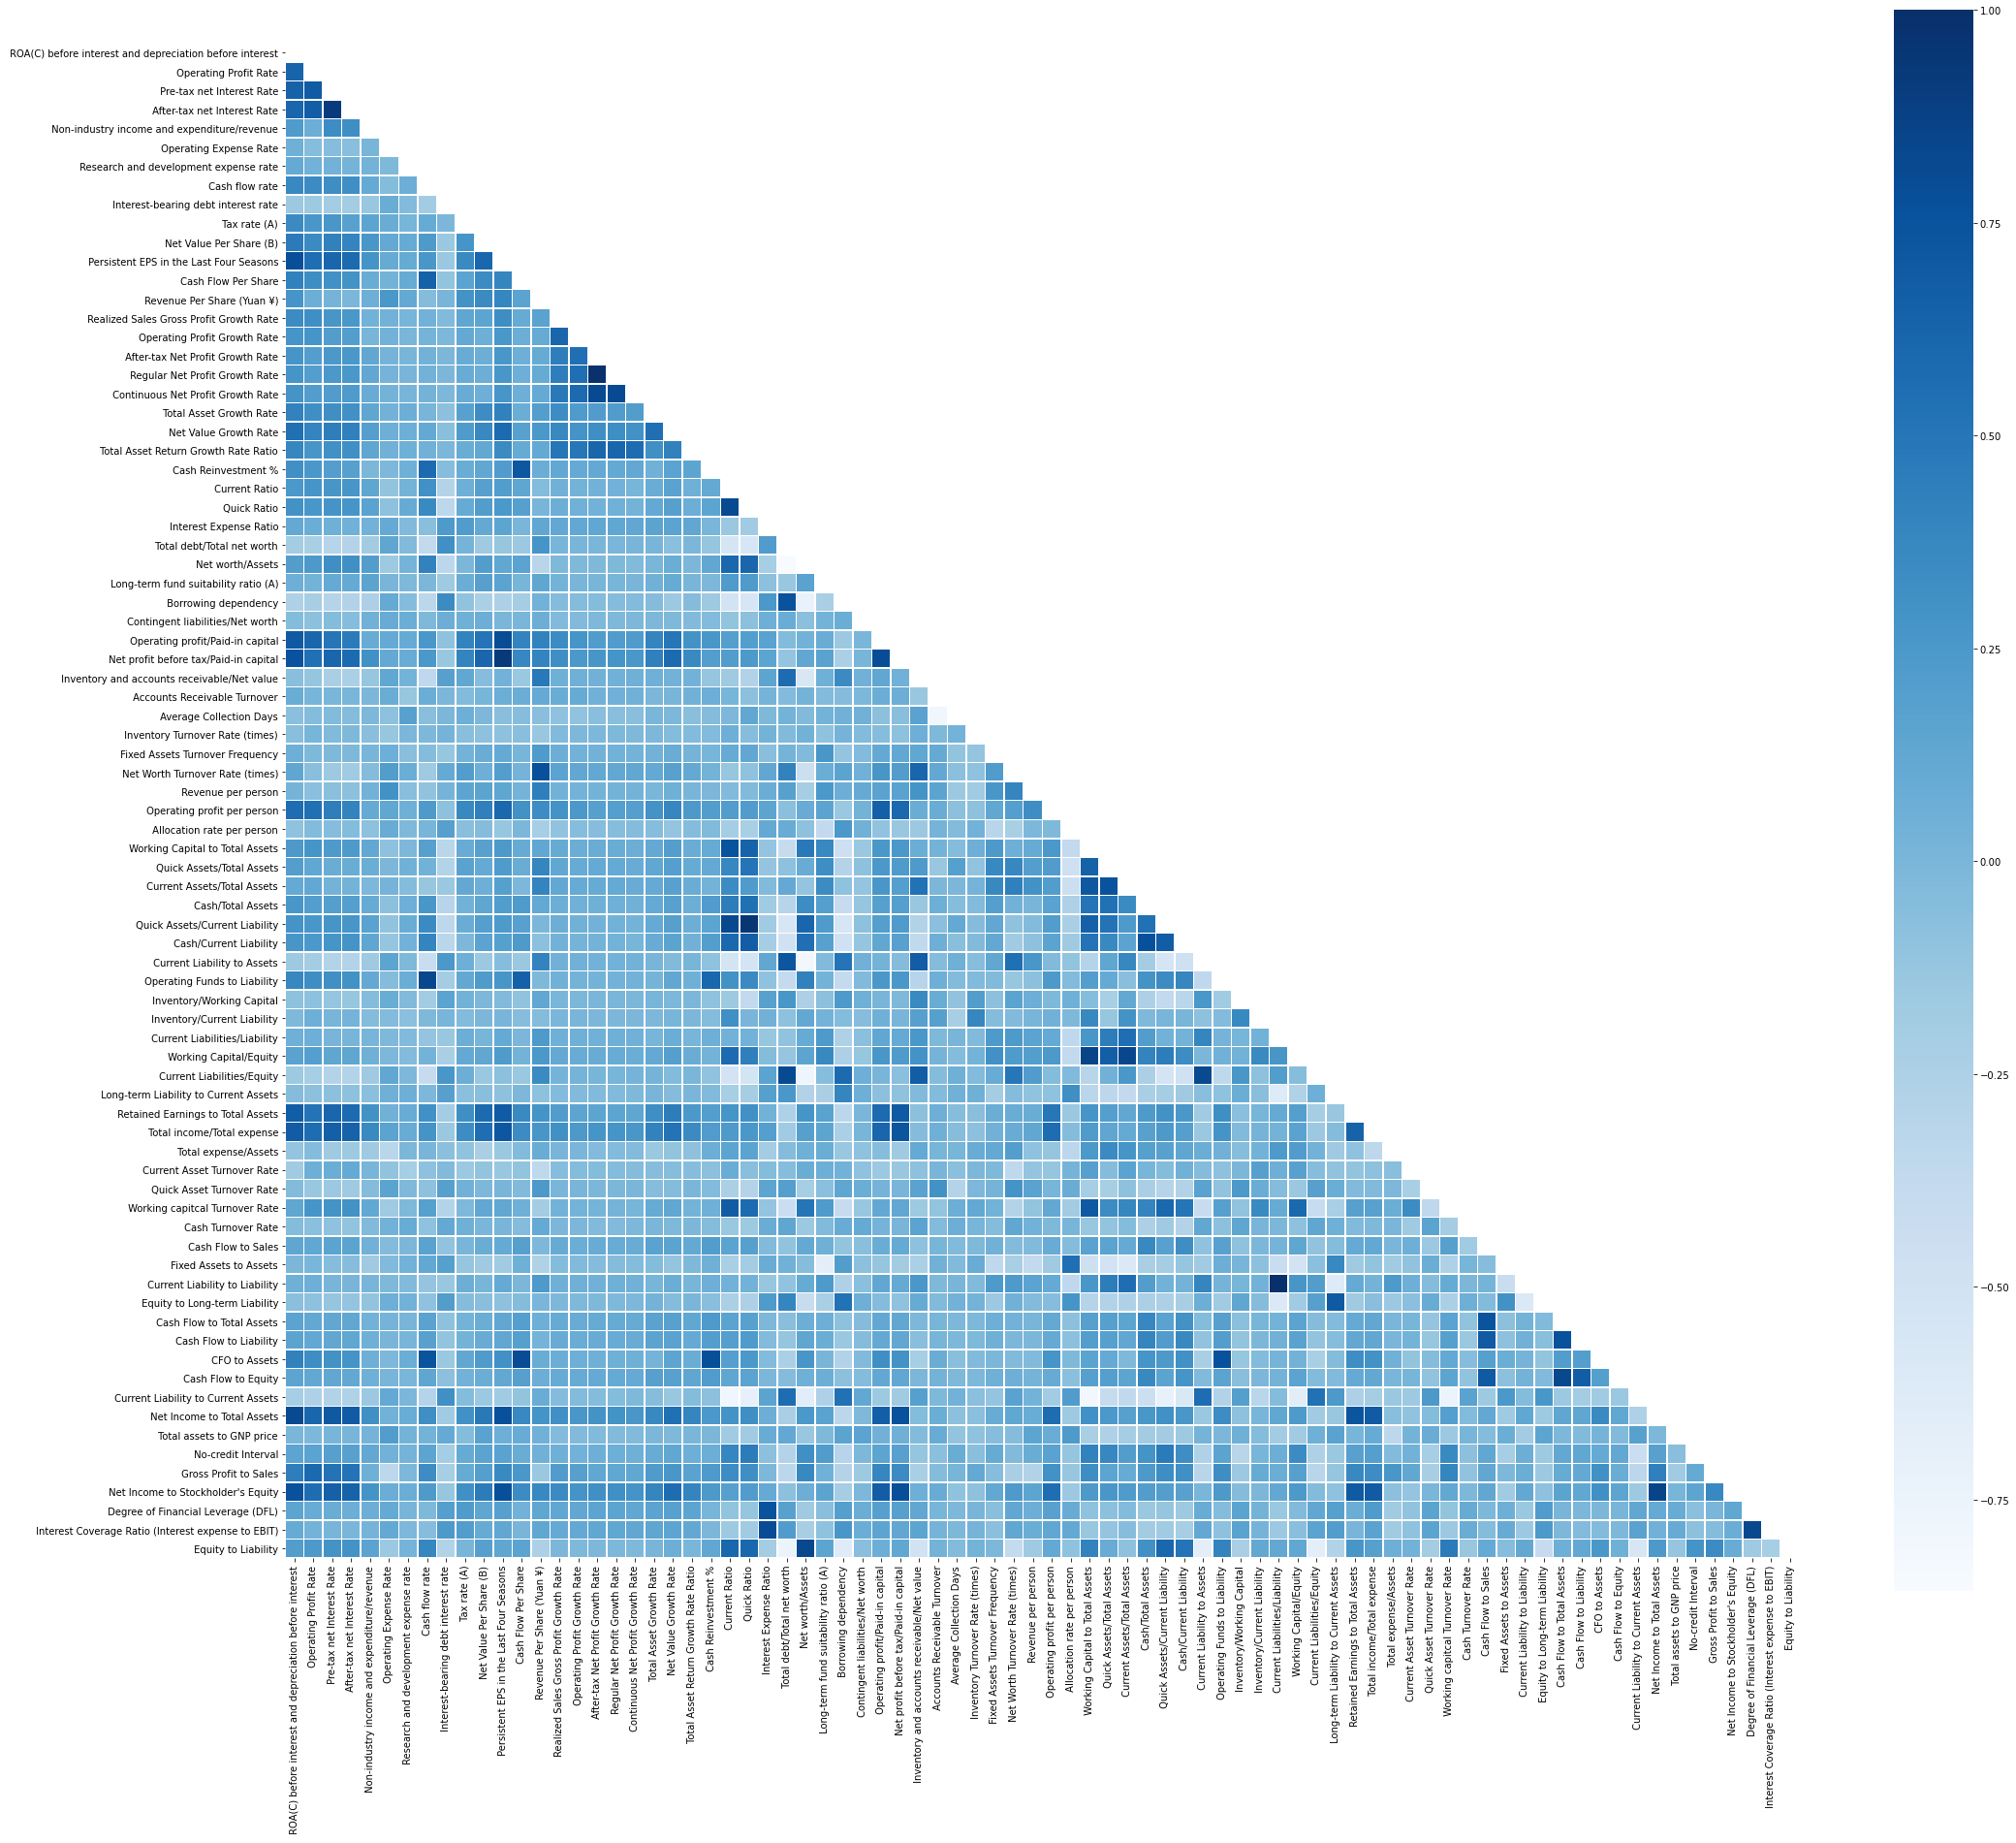

In [120]:
X = full.drop('Bankrupt?',axis = 1)
corr = X.corr()
plt.figure(figsize = (35,30))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, mask=mask,cmap='Blues',square=True, linewidths=.5) #, cbar_kws={"shrink": .5}
plt.show()

In [66]:
#variance inflation factor
# const = pd.DataFrame(np.ones(df1.shape[0]),columns=['intercept']) # creating a constant
# X = df1.drop('Bankrupt?',axis = 1) # independent variables

# X.insert(loc = 0, column = 'intercept', value = const) # adding constant

# #automating vif filtering process
# cols = list(X.columns)
# while len(cols) > 0:
#     vif_df = pd.DataFrame()
#     num = X[cols]
#     vif_df['Features'] = num.columns
#     vif_df['VIF'] = [vif(num.values,i) 
#               for i in range(len(num.columns))]
#     vif_df.set_index('Features',inplace=True)
#     feature_max = vif_df.iloc[1:].idxmax()
#     max_vif = max(vif_df['VIF'][1:])
#     if max_vif > 5:
#         cols.remove(feature_max.values)
#         print('Feature with high vif:', feature_max.values[0],', VIF:', max_vif)

#     else:
#         break